This is your private sketch-notebook. Do whatever you want with it. When code is ready to be developed, please just copy and paste it to the final notebook. 

In [2]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
# from scipy.misc import toimage

# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
#from PIL import Image
import glob
import numpy as np
import pandas as pd
from IPython.display import Image

from IPython.core.display import HTML 

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
# the folder path to the folder with all the fishies in there
folders_path = '../Data/Kaggle/train/*'

# creating a dataframe with the columns below
image_dict = {}

# going through all folders and saving file names in dataframe so that order is always correct
for foldername in glob.glob(folders_path):
    for image_name in glob.glob(foldername + '/*.jpg'):
        # getting image name and fish type and putting it in a dictionary
        fish_type = foldername[-3:]
        image_dict[image_name] = fish_type

image_df = pd.DataFrame(image_dict.items(), columns = ['image_name', 'fish_type']).sample(frac=1) # random sampling
dummy_df = pd.get_dummies(image_df, columns=['fish_type']) # dummify data

dummy_df.head()

image_name  fish_type_ALB  fish_type_ARK  \
2035    ../Data/Kaggle/train/YFT/img_05451.jpg              0              0   
532   ../Data/Kaggle/train/SHARK/img_07056.jpg              0              1   
3515    ../Data/Kaggle/train/YFT/img_01064.jpg              0              0   
3141    ../Data/Kaggle/train/NoF/img_00849.jpg              0              0   
3074    ../Data/Kaggle/train/DOL/img_07212.jpg              0              0   

      fish_type_BET  fish_type_DOL  fish_type_HER  fish_type_LAG  \
2035              0              0              0              0   
532               0              0              0              0   
3515              0              0              0              0   
3141              0              0              0              0   
3074              0              1              0              0   

      fish_type_NoF  fish_type_YFT  
2035              0              1  
532               0              0  
3515              0              1  
3141              1              0  
3074              0              0

In [21]:
from __future__ import division
#import Image
import math
import os

def long_slice(image_path, out_name, slice_size_hor,slice_size_ver):
    """slice an image into parts slice_size tall"""
    img = image.load_img(image_path,target_size = (224,224))
    width, height = img.size
    upper = 0
    left = 0
    hor_slices = int(math.ceil(height/slice_size_hor)) * 2 - 1
    ver_slices = int(math.ceil(width/slice_size_ver)) * 2 - 1
  
    count_hor = 0
    
    for hor_slice in range(hor_slices):
    
        #print count_hor
        if count_hor == hor_slices:
            lower = height
        else:
            lower = int(slice_size_hor + count_hor * slice_size_hor/2)
        count_ver = 0
        left = 0
        for ver_slice in range(ver_slices):
        #if we are at the end, set the lower bound to be the bottom of the image
            
            #set the bounding box! The important bit     
            if count_ver == ver_slices:
                right = width
            else: 
                right = int(slice_size_ver + count_ver *slice_size_ver/2)
            upper = lower - slice_size_hor
            left = right - slice_size_ver

            bbox = (left, upper, right, lower)
            print left, upper, right, lower
            working_slice = img.crop(bbox)
        
            #save the slice
            plt.imshow(working_slice)
            working_slice.save(os.path.join("test/", "slice_" + str(i) + str(j) + str(count_ver)+str(count_hor)+".png"))
            count_ver +=1
            

            
            
        count_hor += 1

#if __name__ == '__main__':
#    #slice_size is the max height of the slices in pixels


In [6]:
def sliding_window(image, stepSize, windowSize):

    # slide a window across the image

    for y in xrange(0, image.shape[0], stepSize):

        for x in xrange(0, image.shape[1], stepSize):

            # yield the current window

            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [7]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

afmetingen = [(0,0.5,0,0.5),(0.5,1,0,0.5),(0.5,1,0.5,1),(0,0.5,0.5,1)]

/usr/local/lib/python2.7/dist-packages/keras/applications/resnet50.py:222: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image dimension ordering convention (`image_dim_ordering="th"`). For best performance, set `image_dim_ordering="tf"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


0 0 56 56
28 0 84 56
56 0 112 56
84 0 140 56
112 0 168 56
140 0 196 56
168 0 224 56
0 28 56 84
28 28 84 84
56 28 112 84
84 28 140 84
112 28 168 84
140 28 196 84
168 28 224 84
0 56 56 112
28 56 84 112
56 56 112 112
84 56 140 112
112 56 168 112
140 56 196 112
168 56 224 112
0 84 56 140
28 84 84 140
56 84 112 140
84 84 140 140
112 84 168 140
140 84 196 140
168 84 224 140
0 112 56 168
28 112 84 168
56 112 112 168
84 112 140 168
112 112 168 168
140 112 196 168
168 112 224 168
0 140 56 196
28 140 84 196
56 140 112 196
84 140 140 196
112 140 168 196
140 140 196 196
168 140 224 196
0 168 56 224
28 168 84 224
56 168 112 224
84 168 140 224
112 168 168 224
140 168 196 224
168 168 224 224
0 0 112 56
56 0 168 56
112 0 224 56
0 28 112 84
56 28 168 84
112 28 224 84
0 56 112 112
56 56 168 112
112 56 224 112
0 84 112 140
56 84 168 140
112 84 224 140
0 112 112 168
56 112 168 168
112 112 224 168
0 140 112 196
56 140 168 196
112 140 224 196
0 168 112 224
56 168 168 224
112 168 224 224
0 0 56 112
28 0 84 1

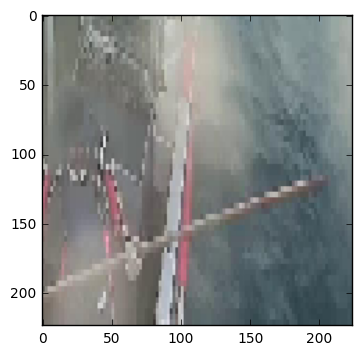

[(u'n03344393', u'fireboat', 0.84165752), (u'n04310018', u'steam_locomotive', 0.007748974), (u'n04552348', u'warplane', 0.0066283676), (u'n04209239', u'shower_curtain', 0.0052763037), (u'n03874293', u'paddlewheel', 0.0050134757), (u'n04347754', u'submarine', 0.0049879635), (u'n09288635', u'geyser', 0.0048175883), (u'n02895154', u'breastplate', 0.0041163121), (u'n03467068', u'guillotine', 0.0039522322), (u'n02977058', u'cash_machine', 0.0037796863)]


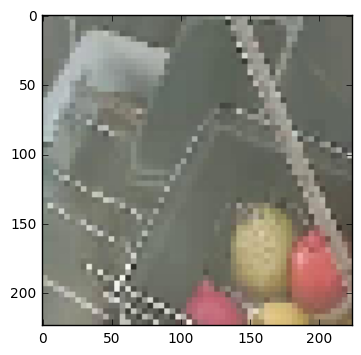

[(u'n03733281', u'maze', 0.17404553), (u'n04332243', u'strainer', 0.06033133), (u'n03344393', u'fireboat', 0.038768977), (u'n02782093', u'balloon', 0.035115372), (u'n03733805', u'measuring_cup', 0.026857443), (u'n02948072', u'candle', 0.026435247), (u'n02699494', u'altar', 0.023940222), (u'n01773549', u'barn_spider', 0.023752624), (u'n03920288', u'Petri_dish', 0.022120476), (u'n02999410', u'chain', 0.018446021)]


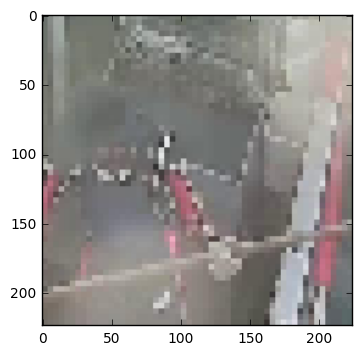

[(u'n03095699', u'container_ship', 0.26170957), (u'n04376876', u'syringe', 0.057347182), (u'n03742115', u'medicine_chest', 0.051134974), (u'n02699494', u'altar', 0.047354914), (u'n04523525', u'vault', 0.022690194), (u'n03344393', u'fireboat', 0.022639606), (u'n04447861', u'toilet_seat', 0.020081131), (u'n04553703', u'washbasin', 0.018173607), (u'n03467068', u'guillotine', 0.017814972), (u'n04070727', u'refrigerator', 0.014985343)]


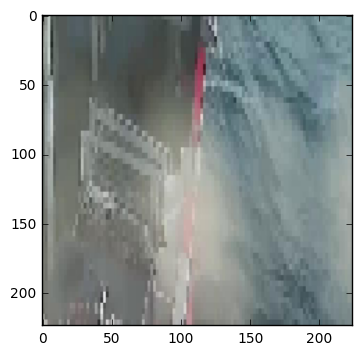

[(u'n03344393', u'fireboat', 0.40668458), (u'n03773504', u'missile', 0.097815543), (u'n03467068', u'guillotine', 0.085591853), (u'n04008634', u'projectile', 0.066338293), (u'n09288635', u'geyser', 0.025326854), (u'n03976657', u'pole', 0.017535813), (u'n04310018', u'steam_locomotive', 0.010694895), (u'n04252225', u'snowplow', 0.010362961), (u'n02977058', u'cash_machine', 0.0092328144), (u'n03902125', u'pay-phone', 0.0088242143)]


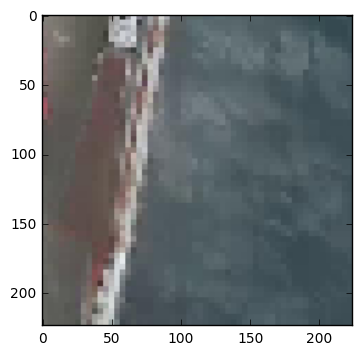

[(u'n03095699', u'container_ship', 0.32942435), (u'n02687172', u'aircraft_carrier', 0.052783325), (u'n03773504', u'missile', 0.037710454), (u'n03344393', u'fireboat', 0.031876769), (u'n03240683', u'drilling_platform', 0.029864514), (u'n04310018', u'steam_locomotive', 0.026433637), (u'n03673027', u'liner', 0.024412243), (u'n04532670', u'viaduct', 0.015968585), (u'n03467068', u'guillotine', 0.01498702), (u'n04347754', u'submarine', 0.013770284)]


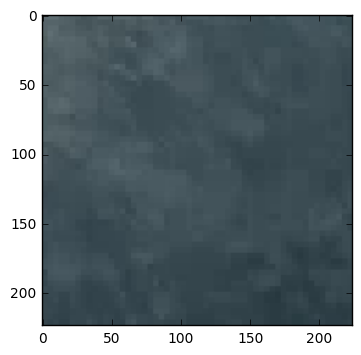

[(u'n02840245', u'binder', 0.065622292), (u'n03773504', u'missile', 0.056955379), (u'n04008634', u'projectile', 0.0529439), (u'n09288635', u'geyser', 0.04413313), (u'n04266014', u'space_shuttle', 0.028115585), (u'n03347037', u'fire_screen', 0.027636858), (u'n02692877', u'airship', 0.022833701), (u'n02074367', u'dugong', 0.019391743), (u'n02066245', u'grey_whale', 0.019112881), (u'n01930112', u'nematode', 0.018331818)]


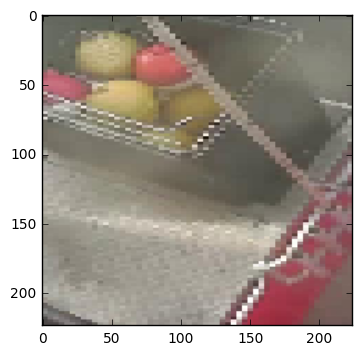

[(u'n03676483', u'lipstick', 0.064748608), (u'n02776631', u'bakery', 0.045234285), (u'n03814906', u'necklace', 0.037766449), (u'n03871628', u'packet', 0.027534368), (u'n02948072', u'candle', 0.025073016), (u'n02999410', u'chain', 0.02439142), (u'n03000684', u'chain_saw', 0.02436953), (u'n03602883', u'joystick', 0.02377893), (u'n03920288', u'Petri_dish', 0.02343348), (u'n03794056', u'mousetrap', 0.019827098)]


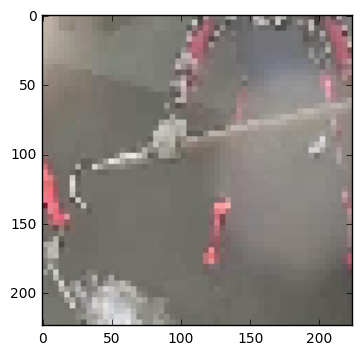

[(u'n03095699', u'container_ship', 0.1807145), (u'n04310018', u'steam_locomotive', 0.045480888), (u'n03345487', u'fire_engine', 0.028371943), (u'n03467068', u'guillotine', 0.027974077), (u'n03344393', u'fireboat', 0.025981525), (u'n04553703', u'washbasin', 0.025137288), (u'n03742115', u'medicine_chest', 0.023258703), (u'n04296562', u'stage', 0.021325704), (u'n03920288', u'Petri_dish', 0.019095484), (u'n04347754', u'submarine', 0.018581675)]


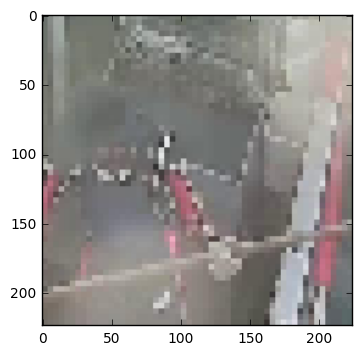

[(u'n03095699', u'container_ship', 0.26170957), (u'n04376876', u'syringe', 0.057347182), (u'n03742115', u'medicine_chest', 0.051134974), (u'n02699494', u'altar', 0.047354914), (u'n04523525', u'vault', 0.022690194), (u'n03344393', u'fireboat', 0.022639606), (u'n04447861', u'toilet_seat', 0.020081131), (u'n04553703', u'washbasin', 0.018173607), (u'n03467068', u'guillotine', 0.017814972), (u'n04070727', u'refrigerator', 0.014985343)]


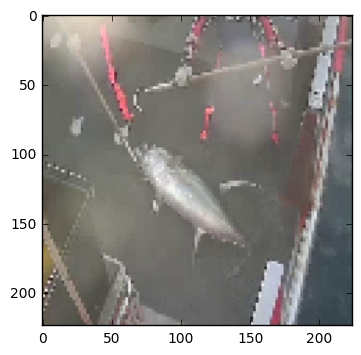

[(u'n03344393', u'fireboat', 0.62038362), (u'n04275548', u'spider_web', 0.072387323), (u'n02895154', u'breastplate', 0.043081108), (u'n04552348', u'warplane', 0.042764116), (u'n03733805', u'measuring_cup', 0.035066567), (u'n01773549', u'barn_spider', 0.011412684), (u'n02640242', u'sturgeon', 0.011085838), (u'n03920288', u'Petri_dish', 0.010867463), (u'n04483307', u'trimaran', 0.010267117), (u'n02999410', u'chain', 0.0076725516)]


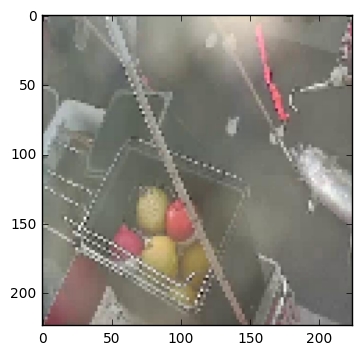

[(u'n04275548', u'spider_web', 0.34584498), (u'n01773549', u'barn_spider', 0.28153864), (u'n12620546', u'hip', 0.074188605), (u'n02999410', u'chain', 0.043324601), (u'n03344393', u'fireboat', 0.029994451), (u'n02948072', u'candle', 0.018810492), (u'n01773157', u'black_and_gold_garden_spider', 0.013989454), (u'n02782093', u'balloon', 0.0087738009), (u'n03920288', u'Petri_dish', 0.0069932668), (u'n04141975', u'scale', 0.0064601563)]


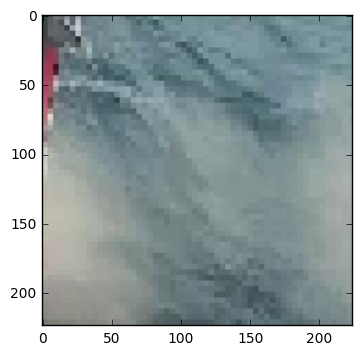

[(u'n03773504', u'missile', 0.67660093), (u'n04008634', u'projectile', 0.22412142), (u'n03344393', u'fireboat', 0.040044311), (u'n04252225', u'snowplow', 0.008277745), (u'n09288635', u'geyser', 0.0052266163), (u'n02704792', u'amphibian', 0.0043480205), (u'n02814860', u'beacon', 0.0040269797), (u'n03666591', u'lighter', 0.0037996424), (u'n04310018', u'steam_locomotive', 0.0034966744), (u'n04266014', u'space_shuttle', 0.0032776978)]


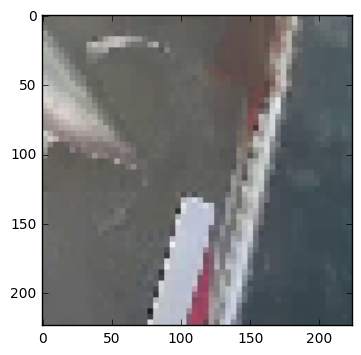

[(u'n02687172', u'aircraft_carrier', 0.12122294), (u'n03884397', u'panpipe', 0.040953301), (u'n04552348', u'warplane', 0.03442461), (u'n03344393', u'fireboat', 0.03260332), (u'n03773504', u'missile', 0.026823146), (u'n03095699', u'container_ship', 0.025134834), (u'n02895154', u'breastplate', 0.022045946), (u'n04266014', u'space_shuttle', 0.019997999), (u'n04153751', u'screw', 0.016277587), (u'n03633091', u'ladle', 0.015411363)]


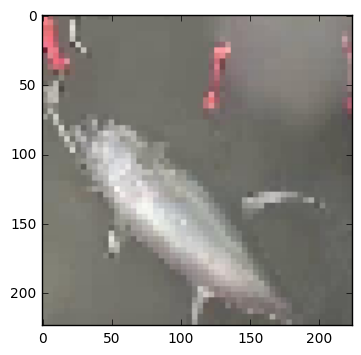

[(u'n02640242', u'sturgeon', 0.33812678), (u'n02536864', u'coho', 0.16692834), (u'n03095699', u'container_ship', 0.071045898), (u'n02514041', u'barracouta', 0.03565171), (u'n02641379', u'gar', 0.020229869), (u'n01494475', u'hammerhead', 0.020222623), (u'n04286575', u'spotlight', 0.016325314), (u'n02692877', u'airship', 0.014619974), (u'n03602883', u'joystick', 0.014384002), (u'n03773504', u'missile', 0.010958891)]


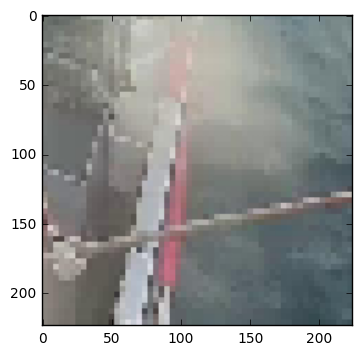

[(u'n03344393', u'fireboat', 0.15761523), (u'n03773504', u'missile', 0.035488565), (u'n04258138', u'solar_dish', 0.032749269), (u'n03633091', u'ladle', 0.031802114), (u'n03874293', u'paddlewheel', 0.029271213), (u'n03126707', u'crane', 0.02845455), (u'n03976657', u'pole', 0.027959131), (u'n04483307', u'trimaran', 0.027726475), (u'n03095699', u'container_ship', 0.0222816), (u'n04428191', u'thresher', 0.019894317)]


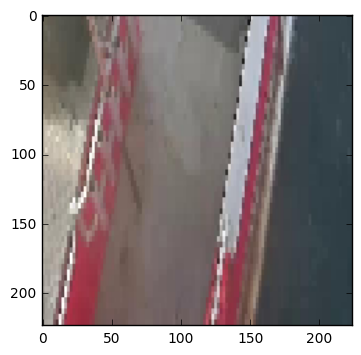

[(u'n03467068', u'guillotine', 0.22118311), (u'n03495258', u'harp', 0.089737728), (u'n02895154', u'breastplate', 0.063635066), (u'n03633091', u'ladle', 0.055552818), (u'n04367480', u'swab', 0.049431287), (u'n03908714', u'pencil_sharpener', 0.030048901), (u'n03902125', u'pay-phone', 0.025100226), (u'n03146219', u'cuirass', 0.022347352), (u'n04209239', u'shower_curtain', 0.020071), (u'n02840245', u'binder', 0.016730595)]


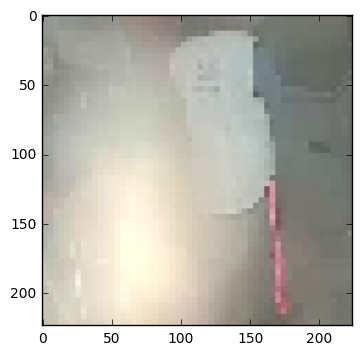

[(u'n03773504', u'missile', 0.66952091), (u'n04008634', u'projectile', 0.23603427), (u'n04266014', u'space_shuttle', 0.034344569), (u'n09288635', u'geyser', 0.0073237773), (u'n03887697', u'paper_towel', 0.0072119245), (u'n02948072', u'candle', 0.0071146195), (u'n02977058', u'cash_machine', 0.0023681349), (u'n02814860', u'beacon', 0.0017543094), (u'n03344393', u'fireboat', 0.0013193861), (u'n04367480', u'swab', 0.0011935454)]


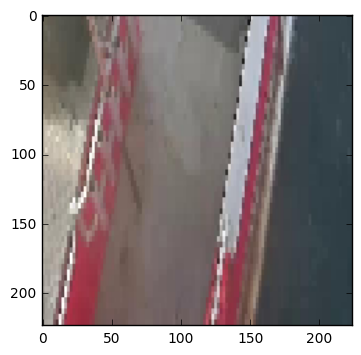

[(u'n03467068', u'guillotine', 0.22118311), (u'n03495258', u'harp', 0.089737728), (u'n02895154', u'breastplate', 0.063635066), (u'n03633091', u'ladle', 0.055552818), (u'n04367480', u'swab', 0.049431287), (u'n03908714', u'pencil_sharpener', 0.030048901), (u'n03902125', u'pay-phone', 0.025100226), (u'n03146219', u'cuirass', 0.022347352), (u'n04209239', u'shower_curtain', 0.020071), (u'n02840245', u'binder', 0.016730595)]


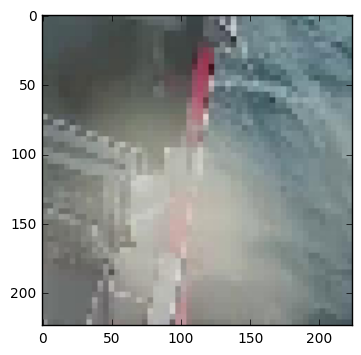

[(u'n03773504', u'missile', 0.77043605), (u'n04008634', u'projectile', 0.21375228), (u'n04266014', u'space_shuttle', 0.0037300822), (u'n03976657', u'pole', 0.0027057773), (u'n03344393', u'fireboat', 0.0015228143), (u'n03535780', u'horizontal_bar', 0.0009052775), (u'n04389033', u'tank', 0.00066146551), (u'n02692877', u'airship', 0.00048078236), (u'n04552348', u'warplane', 0.00046227439), (u'n04252225', u'snowplow', 0.00034255954)]


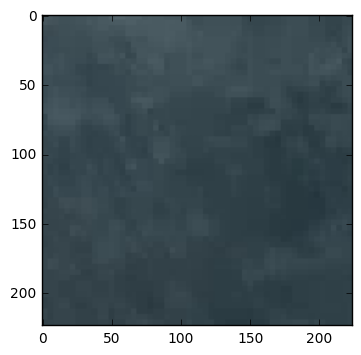

[(u'n04008634', u'projectile', 0.056550346), (u'n03773504', u'missile', 0.055641714), (u'n09288635', u'geyser', 0.052836291), (u'n02840245', u'binder', 0.029999925), (u'n02692877', u'airship', 0.026012091), (u'n04266014', u'space_shuttle', 0.025984544), (u'n03633091', u'ladle', 0.020782124), (u'n02066245', u'grey_whale', 0.019788494), (u'n03535780', u'horizontal_bar', 0.016903453), (u'n02782093', u'balloon', 0.016539527)]


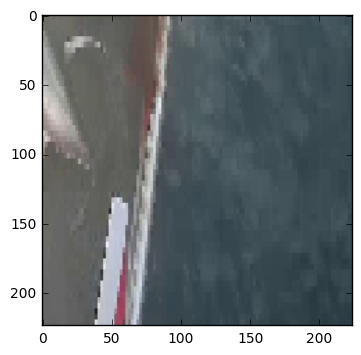

[(u'n03467068', u'guillotine', 0.12212051), (u'n03344393', u'fireboat', 0.080044903), (u'n04258138', u'solar_dish', 0.044988822), (u'n04147183', u'schooner', 0.044081438), (u'n04589890', u'window_screen', 0.027451761), (u'n04483307', u'trimaran', 0.027191075), (u'n02481823', u'chimpanzee', 0.017771605), (u'n02687172', u'aircraft_carrier', 0.017707158), (u'n04040759', u'radiator', 0.017637124), (u'n02895154', u'breastplate', 0.016022773)]


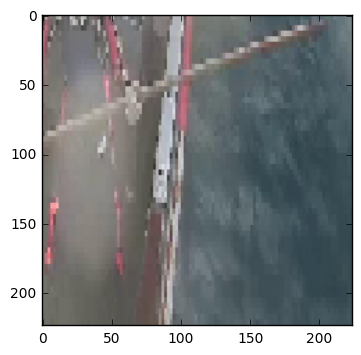

[(u'n04005630', u'prison', 0.25152355), (u'n03467068', u'guillotine', 0.12489869), (u'n03344393', u'fireboat', 0.12107282), (u'n04125021', u'safe', 0.064854115), (u'n03976657', u'pole', 0.026279647), (u'n03127925', u'crate', 0.024521397), (u'n04310018', u'steam_locomotive', 0.022508474), (u'n02481823', u'chimpanzee', 0.01775457), (u'n04604644', u'worm_fence', 0.015681202), (u'n03535780', u'horizontal_bar', 0.014929632)]


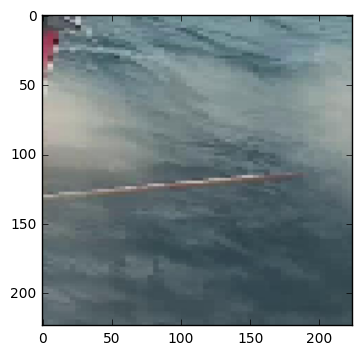

[(u'n03344393', u'fireboat', 0.38469502), (u'n03773504', u'missile', 0.16096814), (u'n04252225', u'snowplow', 0.11653917), (u'n04008634', u'projectile', 0.059936784), (u'n03240683', u'drilling_platform', 0.027756466), (u'n03662601', u'lifeboat', 0.019262046), (u'n04552348', u'warplane', 0.016401557), (u'n02704792', u'amphibian', 0.015813559), (u'n03345487', u'fire_engine', 0.014463353), (u'n04273569', u'speedboat', 0.014033618)]


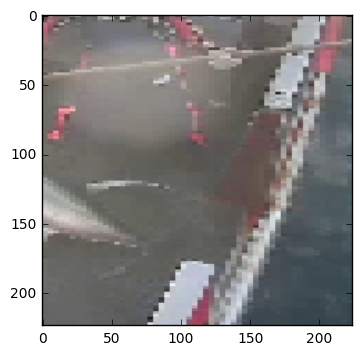

[(u'n02687172', u'aircraft_carrier', 0.25796813), (u'n03344393', u'fireboat', 0.20983563), (u'n04552348', u'warplane', 0.12867513), (u'n03095699', u'container_ship', 0.10514154), (u'n04310018', u'steam_locomotive', 0.024233585), (u'n04389033', u'tank', 0.019619349), (u'n03673027', u'liner', 0.013184276), (u'n02704792', u'amphibian', 0.01308442), (u'n03733805', u'measuring_cup', 0.012805495), (u'n04285008', u'sports_car', 0.011161756)]


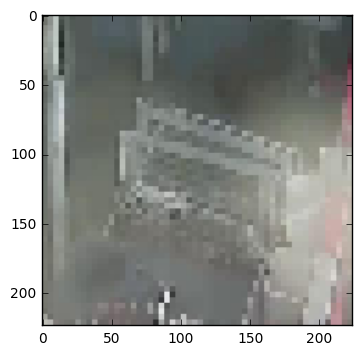

[(u'n03467068', u'guillotine', 0.13962698), (u'n03902125', u'pay-phone', 0.084422424), (u'n02977058', u'cash_machine', 0.063420042), (u'n03742115', u'medicine_chest', 0.053940278), (u'n04589890', u'window_screen', 0.040180922), (u'n03857828', u'oscilloscope', 0.032297764), (u'n04296562', u'stage', 0.025986223), (u'n04111531', u'rotisserie', 0.025541937), (u'n02808440', u'bathtub', 0.022367647), (u'n03347037', u'fire_screen', 0.021700803)]


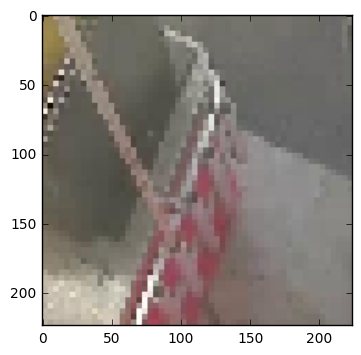

[(u'n04523525', u'vault', 0.042031717), (u'n01753488', u'horned_viper', 0.028845567), (u'n03344393', u'fireboat', 0.028024938), (u'n01675722', u'banded_gecko', 0.0202327), (u'n03633091', u'ladle', 0.019638401), (u'n03291819', u'envelope', 0.018539356), (u'n03874293', u'paddlewheel', 0.018045519), (u'n04589890', u'window_screen', 0.01597842), (u'n02895154', u'breastplate', 0.014464755), (u'n02095314', u'wire-haired_fox_terrier', 0.013733995)]


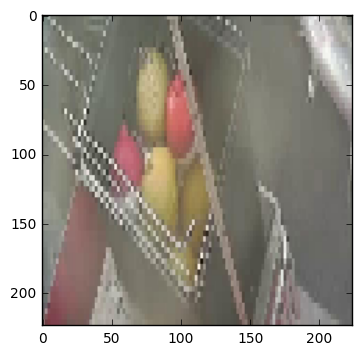

[(u'n03676483', u'lipstick', 0.12694366), (u'n03344393', u'fireboat', 0.07802096), (u'n07753275', u'pineapple', 0.071576394), (u'n02999410', u'chain', 0.058803715), (u'n01773157', u'black_and_gold_garden_spider', 0.056960497), (u'n04275548', u'spider_web', 0.054715876), (u'n01773549', u'barn_spider', 0.046647884), (u'n04116512', u'rubber_eraser', 0.043030087), (u'n02667093', u'abaya', 0.034496531), (u'n04118776', u'rule', 0.031739108)]


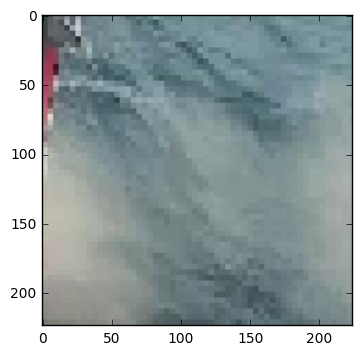

[(u'n03773504', u'missile', 0.67660093), (u'n04008634', u'projectile', 0.22412142), (u'n03344393', u'fireboat', 0.040044311), (u'n04252225', u'snowplow', 0.008277745), (u'n09288635', u'geyser', 0.0052266163), (u'n02704792', u'amphibian', 0.0043480205), (u'n02814860', u'beacon', 0.0040269797), (u'n03666591', u'lighter', 0.0037996424), (u'n04310018', u'steam_locomotive', 0.0034966744), (u'n04266014', u'space_shuttle', 0.0032776978)]


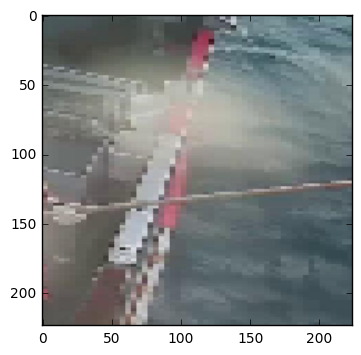

[(u'n03773504', u'missile', 0.29776227), (u'n03344393', u'fireboat', 0.18190373), (u'n02687172', u'aircraft_carrier', 0.17025355), (u'n04008634', u'projectile', 0.13795167), (u'n03095699', u'container_ship', 0.03406737), (u'n04552348', u'warplane', 0.030646997), (u'n04592741', u'wing', 0.011983225), (u'n04389033', u'tank', 0.011053349), (u'n02692877', u'airship', 0.010388335), (u'n02690373', u'airliner', 0.010387742)]


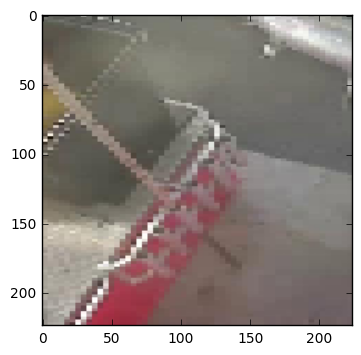

[(u'n02999410', u'chain', 0.12071771), (u'n03344393', u'fireboat', 0.035094157), (u'n03065424', u'coil', 0.028294025), (u'n03291819', u'envelope', 0.027656576), (u'n04552348', u'warplane', 0.024491716), (u'n02687172', u'aircraft_carrier', 0.023122616), (u'n03485794', u'handkerchief', 0.022974532), (u'n04525038', u'velvet', 0.022457538), (u'n03773504', u'missile', 0.021594783), (u'n04008634', u'projectile', 0.020919546)]


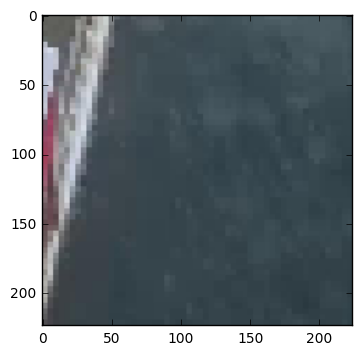

[(u'n02840245', u'binder', 0.16052921), (u'n02814860', u'beacon', 0.10839055), (u'n03095699', u'container_ship', 0.049174737), (u'n03930313', u'picket_fence', 0.03829243), (u'n02687172', u'aircraft_carrier', 0.035614707), (u'n07248320', u'book_jacket', 0.025413183), (u'n04589890', u'window_screen', 0.02371528), (u'n03884397', u'panpipe', 0.023095645), (u'n03673027', u'liner', 0.017446648), (u'n03291819', u'envelope', 0.016143339)]


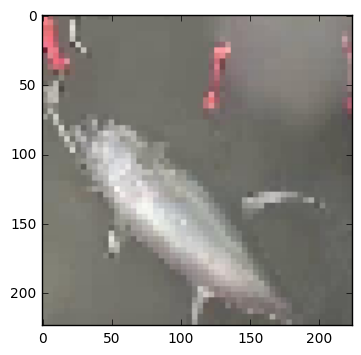

[(u'n02640242', u'sturgeon', 0.33812678), (u'n02536864', u'coho', 0.16692834), (u'n03095699', u'container_ship', 0.071045898), (u'n02514041', u'barracouta', 0.03565171), (u'n02641379', u'gar', 0.020229869), (u'n01494475', u'hammerhead', 0.020222623), (u'n04286575', u'spotlight', 0.016325314), (u'n02692877', u'airship', 0.014619974), (u'n03602883', u'joystick', 0.014384002), (u'n03773504', u'missile', 0.010958891)]


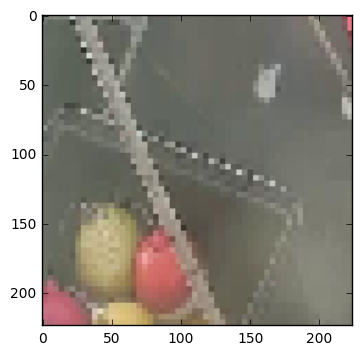

[(u'n02699494', u'altar', 0.098013356), (u'n03095699', u'container_ship', 0.090463892), (u'n04332243', u'strainer', 0.050054643), (u'n02948072', u'candle', 0.035404351), (u'n02687172', u'aircraft_carrier', 0.032453261), (u'n02999410', u'chain', 0.028271316), (u'n04310018', u'steam_locomotive', 0.022859737), (u'n02782093', u'balloon', 0.021709479), (u'n03920288', u'Petri_dish', 0.018868791), (u'n04429376', u'throne', 0.017866623)]


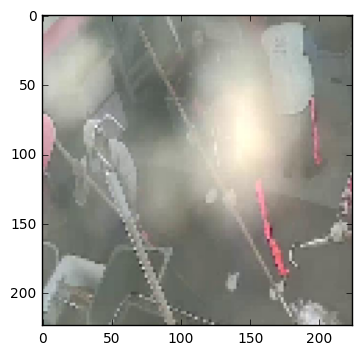

[(u'n04275548', u'spider_web', 0.33083609), (u'n12620546', u'hip', 0.10552659), (u'n01773549', u'barn_spider', 0.049104549), (u'n03773504', u'missile', 0.026282027), (u'n02892767', u'brassiere', 0.026263421), (u'n01773157', u'black_and_gold_garden_spider', 0.025368575), (u'n01773797', u'garden_spider', 0.024691751), (u'n03344393', u'fireboat', 0.021398427), (u'n02708093', u'analog_clock', 0.016634634), (u'n04552348', u'warplane', 0.016101442)]


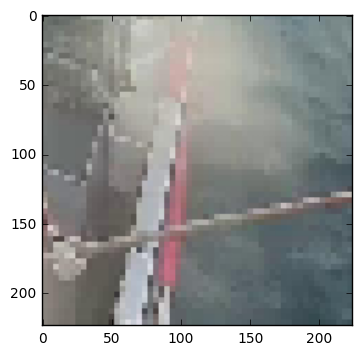

[(u'n03344393', u'fireboat', 0.15761523), (u'n03773504', u'missile', 0.035488565), (u'n04258138', u'solar_dish', 0.032749269), (u'n03633091', u'ladle', 0.031802114), (u'n03874293', u'paddlewheel', 0.029271213), (u'n03126707', u'crane', 0.02845455), (u'n03976657', u'pole', 0.027959131), (u'n04483307', u'trimaran', 0.027726475), (u'n03095699', u'container_ship', 0.0222816), (u'n04428191', u'thresher', 0.019894317)]


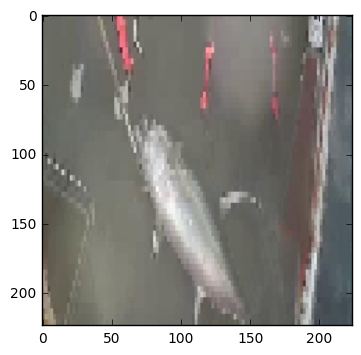

[(u'n03344393', u'fireboat', 0.63821787), (u'n02895154', u'breastplate', 0.090232484), (u'n03062245', u'cocktail_shaker', 0.028892433), (u'n04125021', u'safe', 0.024752174), (u'n03146219', u'cuirass', 0.014122064), (u'n02999410', u'chain', 0.010095036), (u'n04033901', u'quill', 0.0072634909), (u'n04367480', u'swab', 0.007000403), (u'n02977058', u'cash_machine', 0.005000954), (u'n03467068', u'guillotine', 0.0046104374)]


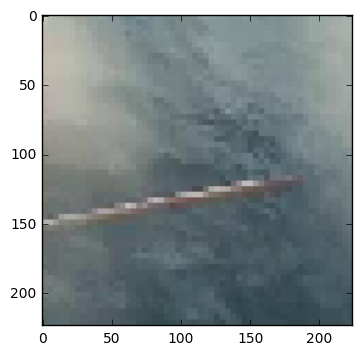

[(u'n09288635', u'geyser', 0.8104701), (u'n09472597', u'volcano', 0.029630216), (u'n01630670', u'common_newt', 0.019977503), (u'n02268853', u'damselfly', 0.016391857), (u'n02641379', u'gar', 0.0099806907), (u'n02066245', u'grey_whale', 0.0053886324), (u'n04347754', u'submarine', 0.0050048558), (u'n01685808', u'whiptail', 0.0043532625), (u'n01496331', u'electric_ray', 0.0043379762), (u'n03633091', u'ladle', 0.0041682217)]


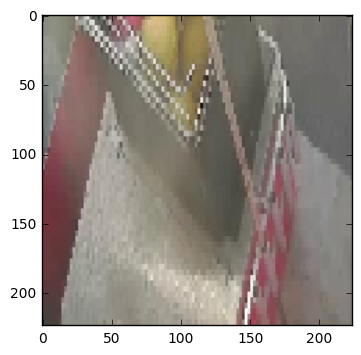

[(u'n04591157', u'Windsor_tie', 0.071770966), (u'n03344393', u'fireboat', 0.071020134), (u'n03871628', u'packet', 0.050836239), (u'n03450230', u'gown', 0.044802066), (u'n02667093', u'abaya', 0.042254325), (u'n02895154', u'breastplate', 0.036139958), (u'n04525038', u'velvet', 0.034673668), (u'n04532106', u'vestment', 0.029177863), (u'n03676483', u'lipstick', 0.025747238), (u'n03291819', u'envelope', 0.020765934)]


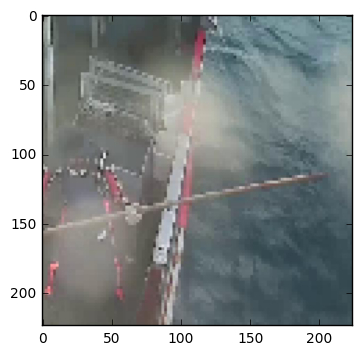

[(u'n03344393', u'fireboat', 0.27090648), (u'n03733805', u'measuring_cup', 0.26553497), (u'n04111531', u'rotisserie', 0.038619265), (u'n04310018', u'steam_locomotive', 0.035336722), (u'n04552348', u'warplane', 0.024818368), (u'n03976657', u'pole', 0.020939499), (u'n04149813', u'scoreboard', 0.01910297), (u'n04125021', u'safe', 0.017068414), (u'n03773504', u'missile', 0.013783716), (u'n04376876', u'syringe', 0.013634712)]


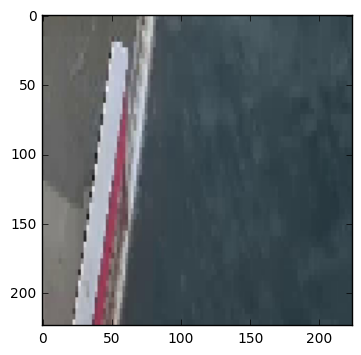

[(u'n02840245', u'binder', 0.099989966), (u'n03467068', u'guillotine', 0.097250283), (u'n02687172', u'aircraft_carrier', 0.047554921), (u'n04589890', u'window_screen', 0.038445592), (u'n04258138', u'solar_dish', 0.032642681), (u'n03291819', u'envelope', 0.02449641), (u'n04367480', u'swab', 0.016390949), (u'n07248320', u'book_jacket', 0.016174169), (u'n04209239', u'shower_curtain', 0.016023917), (u'n03742115', u'medicine_chest', 0.014854665)]


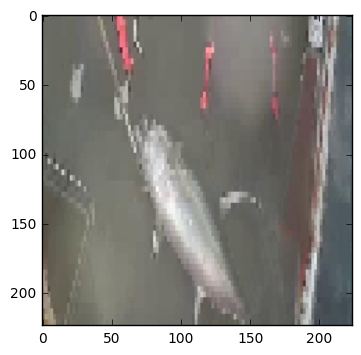

[(u'n03344393', u'fireboat', 0.63821787), (u'n02895154', u'breastplate', 0.090232484), (u'n03062245', u'cocktail_shaker', 0.028892433), (u'n04125021', u'safe', 0.024752174), (u'n03146219', u'cuirass', 0.014122064), (u'n02999410', u'chain', 0.010095036), (u'n04033901', u'quill', 0.0072634909), (u'n04367480', u'swab', 0.007000403), (u'n02977058', u'cash_machine', 0.005000954), (u'n03467068', u'guillotine', 0.0046104374)]


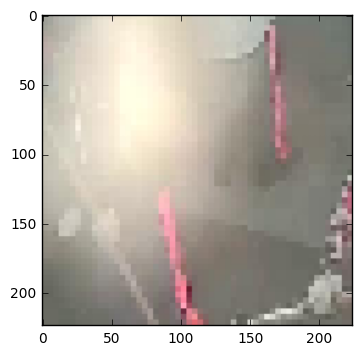

[(u'n03344393', u'fireboat', 0.84141296), (u'n03773504', u'missile', 0.084604643), (u'n04008634', u'projectile', 0.02224719), (u'n04310018', u'steam_locomotive', 0.0096718203), (u'n02699494', u'altar', 0.0028633829), (u'n04376876', u'syringe', 0.0025699679), (u'n03345487', u'fire_engine', 0.0025027874), (u'n04367480', u'swab', 0.0022936477), (u'n02948072', u'candle', 0.0019487583), (u'n03126707', u'crane', 0.0018087621)]


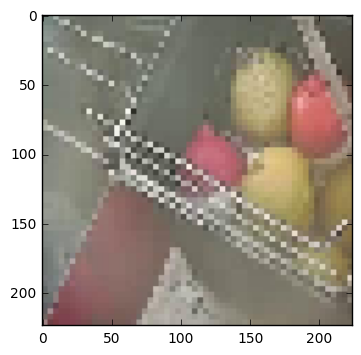

[(u'n03676483', u'lipstick', 0.40292159), (u'n02948072', u'candle', 0.053189024), (u'n03920288', u'Petri_dish', 0.038263679), (u'n03291819', u'envelope', 0.035242032), (u'n03095699', u'container_ship', 0.028498365), (u'n07932039', u'eggnog', 0.025204498), (u'n03733805', u'measuring_cup', 0.023468589), (u'n07565083', u'menu', 0.016103366), (u'n04141975', u'scale', 0.011855699), (u'n04116512', u'rubber_eraser', 0.011637121)]


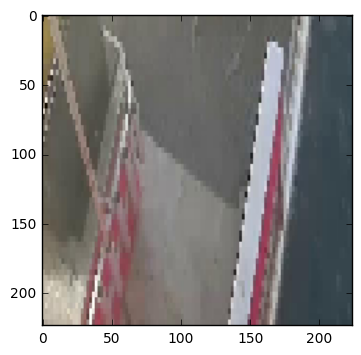

[(u'n03467068', u'guillotine', 0.66067261), (u'n02895154', u'breastplate', 0.030263996), (u'n03344393', u'fireboat', 0.027038034), (u'n04209239', u'shower_curtain', 0.020759979), (u'n02999410', u'chain', 0.016436825), (u'n03794056', u'mousetrap', 0.012510048), (u'n03146219', u'cuirass', 0.010838952), (u'n04367480', u'swab', 0.008758422), (u'n03742115', u'medicine_chest', 0.007864506), (u'n04125021', u'safe', 0.0067941491)]


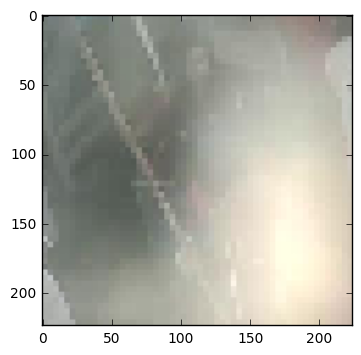

[(u'n03773504', u'missile', 0.29792568), (u'n03344393', u'fireboat', 0.16179211), (u'n09288635', u'geyser', 0.15000825), (u'n04008634', u'projectile', 0.11867855), (u'n03388043', u'fountain', 0.00844202), (u'n02977058', u'cash_machine', 0.0070704557), (u'n01776313', u'tick', 0.0067487126), (u'n04310018', u'steam_locomotive', 0.0066257245), (u'n04286575', u'spotlight', 0.0055442606), (u'n03291819', u'envelope', 0.0054041417)]


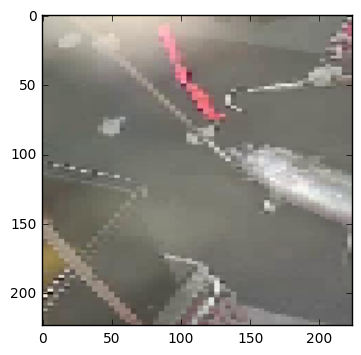

[(u'n04552348', u'warplane', 0.52088928), (u'n02687172', u'aircraft_carrier', 0.23972437), (u'n03344393', u'fireboat', 0.048927724), (u'n03773504', u'missile', 0.039159164), (u'n04008634', u'projectile', 0.018299535), (u'n02708093', u'analog_clock', 0.011247689), (u'n02690373', u'airliner', 0.0079618944), (u'n02999410', u'chain', 0.007927754), (u'n04592741', u'wing', 0.0067965444), (u'n04275548', u'spider_web', 0.006442551)]


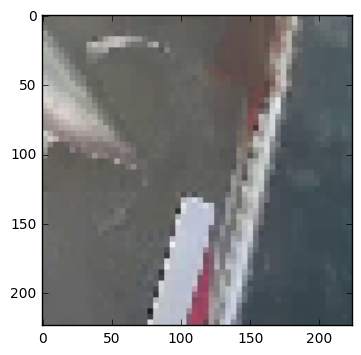

[(u'n02687172', u'aircraft_carrier', 0.12122294), (u'n03884397', u'panpipe', 0.040953301), (u'n04552348', u'warplane', 0.03442461), (u'n03344393', u'fireboat', 0.03260332), (u'n03773504', u'missile', 0.026823146), (u'n03095699', u'container_ship', 0.025134834), (u'n02895154', u'breastplate', 0.022045946), (u'n04266014', u'space_shuttle', 0.019997999), (u'n04153751', u'screw', 0.016277587), (u'n03633091', u'ladle', 0.015411363)]


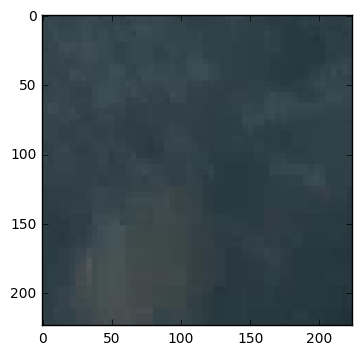

[(u'n03773504', u'missile', 0.10843369), (u'n09288635', u'geyser', 0.088386029), (u'n04008634', u'projectile', 0.053753361), (u'n02692877', u'airship', 0.032712709), (u'n04266014', u'space_shuttle', 0.029779376), (u'n01608432', u'kite', 0.028362306), (u'n03888257', u'parachute', 0.019909857), (u'n02782093', u'balloon', 0.019649854), (u'n09472597', u'volcano', 0.019584393), (u'n02002724', u'black_stork', 0.018307358)]


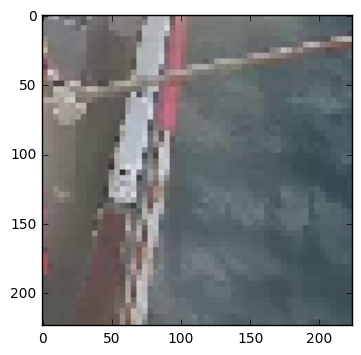

[(u'n03095699', u'container_ship', 0.12174971), (u'n03535780', u'horizontal_bar', 0.084674008), (u'n03976657', u'pole', 0.078091472), (u'n04366367', u'suspension_bridge', 0.063778624), (u'n04311004', u'steel_arch_bridge', 0.061864313), (u'n03344393', u'fireboat', 0.059562627), (u'n03888605', u'parallel_bars', 0.057720415), (u'n04532670', u'viaduct', 0.039586045), (u'n03933933', u'pier', 0.032394141), (u'n04258138', u'solar_dish', 0.017058266)]


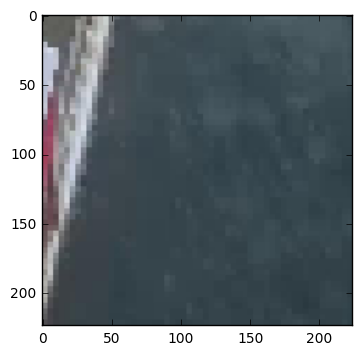

[(u'n02840245', u'binder', 0.16052921), (u'n02814860', u'beacon', 0.10839055), (u'n03095699', u'container_ship', 0.049174737), (u'n03930313', u'picket_fence', 0.03829243), (u'n02687172', u'aircraft_carrier', 0.035614707), (u'n07248320', u'book_jacket', 0.025413183), (u'n04589890', u'window_screen', 0.02371528), (u'n03884397', u'panpipe', 0.023095645), (u'n03673027', u'liner', 0.017446648), (u'n03291819', u'envelope', 0.016143339)]


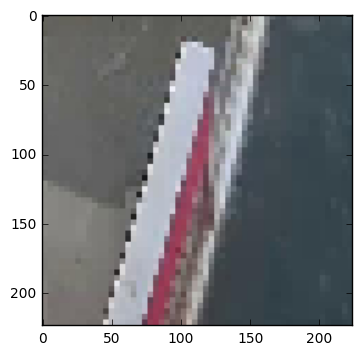

[(u'n02687172', u'aircraft_carrier', 0.10688517), (u'n04552348', u'warplane', 0.042406388), (u'n02692877', u'airship', 0.0401689), (u'n03291819', u'envelope', 0.039687388), (u'n03633091', u'ladle', 0.038850676), (u'n03908714', u'pencil_sharpener', 0.035509292), (u'n03884397', u'panpipe', 0.033412386), (u'n02690373', u'airliner', 0.032936342), (u'n04266014', u'space_shuttle', 0.030382035), (u'n03467068', u'guillotine', 0.025826281)]


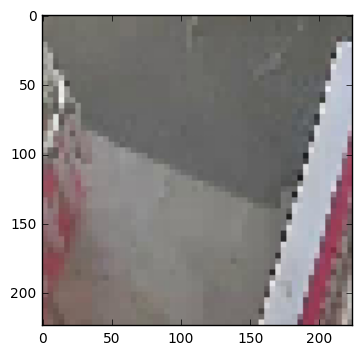

[(u'n03673027', u'liner', 0.11992356), (u'n03095699', u'container_ship', 0.099908382), (u'n02687172', u'aircraft_carrier', 0.080678664), (u'n03773504', u'missile', 0.076947421), (u'n03291819', u'envelope', 0.057611831), (u'n02692877', u'airship', 0.036871549), (u'n03884397', u'panpipe', 0.036359575), (u'n04346328', u'stupa', 0.026621787), (u'n03908714', u'pencil_sharpener', 0.025182609), (u'n04266014', u'space_shuttle', 0.022551201)]


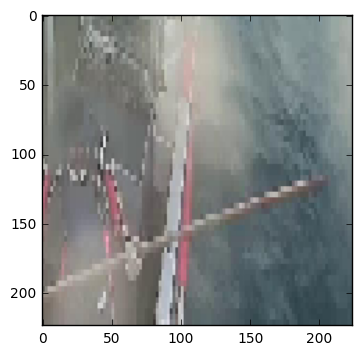

[(u'n03344393', u'fireboat', 0.84165752), (u'n04310018', u'steam_locomotive', 0.007748974), (u'n04552348', u'warplane', 0.0066283676), (u'n04209239', u'shower_curtain', 0.0052763037), (u'n03874293', u'paddlewheel', 0.0050134757), (u'n04347754', u'submarine', 0.0049879635), (u'n09288635', u'geyser', 0.0048175883), (u'n02895154', u'breastplate', 0.0041163121), (u'n03467068', u'guillotine', 0.0039522322), (u'n02977058', u'cash_machine', 0.0037796863)]


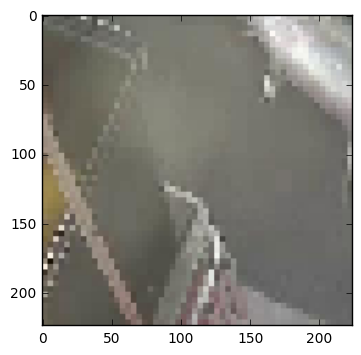

[(u'n03344393', u'fireboat', 0.23450744), (u'n02687172', u'aircraft_carrier', 0.081197977), (u'n03773504', u'missile', 0.043144695), (u'n03095699', u'container_ship', 0.038005531), (u'n02895154', u'breastplate', 0.034190141), (u'n04008634', u'projectile', 0.03222144), (u'n04552348', u'warplane', 0.030079177), (u'n04525038', u'velvet', 0.021932876), (u'n02999410', u'chain', 0.02003924), (u'n03673027', u'liner', 0.0146453)]


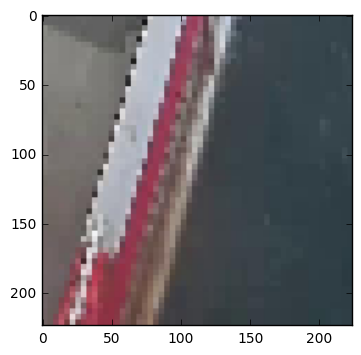

[(u'n03908714', u'pencil_sharpener', 0.17088245), (u'n03467068', u'guillotine', 0.14527106), (u'n03495258', u'harp', 0.054584112), (u'n03633091', u'ladle', 0.047504071), (u'n03794056', u'mousetrap', 0.035206158), (u'n02840245', u'binder', 0.029612705), (u'n04153751', u'screw', 0.028969949), (u'n02788148', u'bannister', 0.023858385), (u'n03291819', u'envelope', 0.017597137), (u'n04367480', u'swab', 0.017575763)]


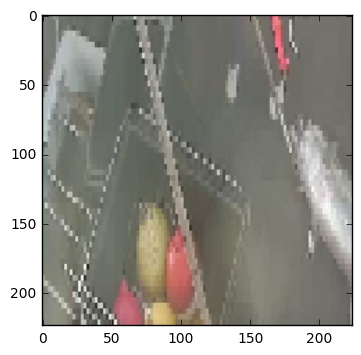

[(u'n03344393', u'fireboat', 0.12625511), (u'n02999410', u'chain', 0.11145253), (u'n01773549', u'barn_spider', 0.069248997), (u'n03773504', u'missile', 0.069113016), (u'n04275548', u'spider_web', 0.064098865), (u'n01773157', u'black_and_gold_garden_spider', 0.046187572), (u'n02667093', u'abaya', 0.039599758), (u'n04209239', u'shower_curtain', 0.022466542), (u'n04552348', u'warplane', 0.019320143), (u'n03814906', u'necklace', 0.016941631)]


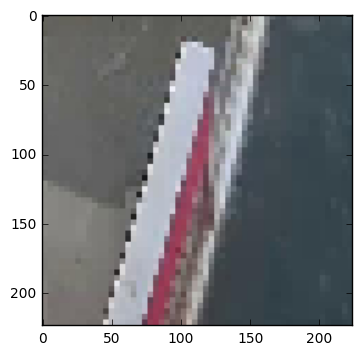

[(u'n02687172', u'aircraft_carrier', 0.10688517), (u'n04552348', u'warplane', 0.042406388), (u'n02692877', u'airship', 0.0401689), (u'n03291819', u'envelope', 0.039687388), (u'n03633091', u'ladle', 0.038850676), (u'n03908714', u'pencil_sharpener', 0.035509292), (u'n03884397', u'panpipe', 0.033412386), (u'n02690373', u'airliner', 0.032936342), (u'n04266014', u'space_shuttle', 0.030382035), (u'n03467068', u'guillotine', 0.025826281)]


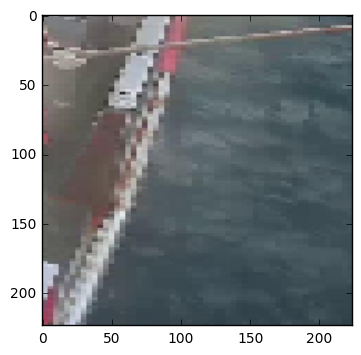

[(u'n02687172', u'aircraft_carrier', 0.58072007), (u'n03095699', u'container_ship', 0.25503469), (u'n03344393', u'fireboat', 0.03780625), (u'n03673027', u'liner', 0.023171939), (u'n03933933', u'pier', 0.0085897977), (u'n03733281', u'maze', 0.0058202771), (u'n04552348', u'warplane', 0.0054022181), (u'n04389033', u'tank', 0.0049610073), (u'n03773504', u'missile', 0.0035542417), (u'n04347754', u'submarine', 0.0032384186)]


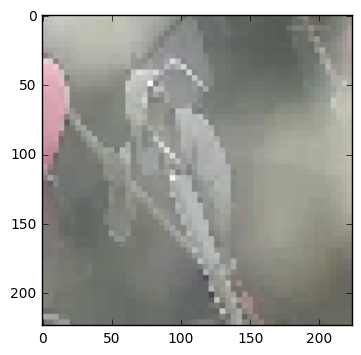

[(u'n03344393', u'fireboat', 0.43477941), (u'n02892767', u'brassiere', 0.08476384), (u'n01910747', u'jellyfish', 0.017533185), (u'n03291819', u'envelope', 0.015593356), (u'n03733805', u'measuring_cup', 0.011376135), (u'n01968897', u'chambered_nautilus', 0.011305365), (u'n02999410', u'chain', 0.010148309), (u'n04286575', u'spotlight', 0.0096284468), (u'n04310018', u'steam_locomotive', 0.0090375021), (u'n09288635', u'geyser', 0.0084969699)]


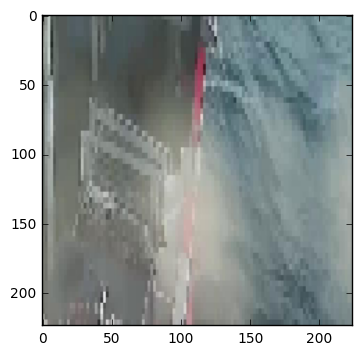

[(u'n03344393', u'fireboat', 0.40668458), (u'n03773504', u'missile', 0.097815543), (u'n03467068', u'guillotine', 0.085591853), (u'n04008634', u'projectile', 0.066338293), (u'n09288635', u'geyser', 0.025326854), (u'n03976657', u'pole', 0.017535813), (u'n04310018', u'steam_locomotive', 0.010694895), (u'n04252225', u'snowplow', 0.010362961), (u'n02977058', u'cash_machine', 0.0092328144), (u'n03902125', u'pay-phone', 0.0088242143)]


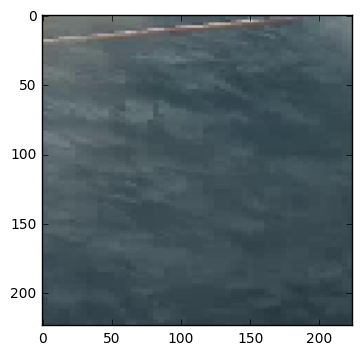

[(u'n02687172', u'aircraft_carrier', 0.088966385), (u'n03344393', u'fireboat', 0.078070581), (u'n09399592', u'promontory', 0.046730466), (u'n04483307', u'trimaran', 0.04021319), (u'n03240683', u'drilling_platform', 0.037195839), (u'n09421951', u'sandbar', 0.029424921), (u'n03535780', u'horizontal_bar', 0.026362268), (u'n04347754', u'submarine', 0.024232026), (u'n03673027', u'liner', 0.023382053), (u'n02071294', u'killer_whale', 0.0232343)]


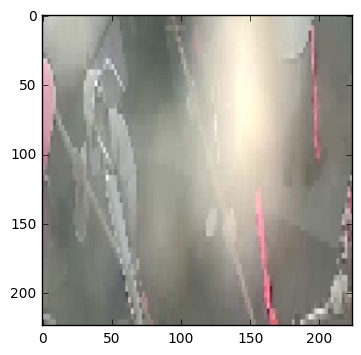

[(u'n03344393', u'fireboat', 0.93306583), (u'n02892767', u'brassiere', 0.0072953459), (u'n03676483', u'lipstick', 0.0064004059), (u'n02948072', u'candle', 0.0046469918), (u'n03773504', u'missile', 0.0028405369), (u'n03388043', u'fountain', 0.002515927), (u'n09288635', u'geyser', 0.001930515), (u'n03450230', u'gown', 0.0017372458), (u'n04008634', u'projectile', 0.0013130914), (u'n10148035', u'groom', 0.0012547745)]


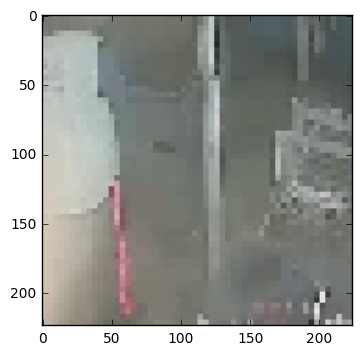

[(u'n03773504', u'missile', 0.18247718), (u'n02977058', u'cash_machine', 0.052727852), (u'n03344393', u'fireboat', 0.050880957), (u'n04310018', u'steam_locomotive', 0.043713696), (u'n04008634', u'projectile', 0.04013009), (u'n03976657', u'pole', 0.024882587), (u'n03467068', u'guillotine', 0.023576418), (u'n03857828', u'oscilloscope', 0.019357271), (u'n03924679', u'photocopier', 0.013280029), (u'n02815834', u'beaker', 0.012888311)]


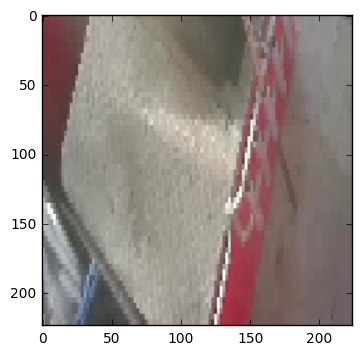

[(u'n04591157', u'Windsor_tie', 0.31156275), (u'n02834397', u'bib', 0.13662317), (u'n02895154', u'breastplate', 0.048771203), (u'n03485794', u'handkerchief', 0.047119398), (u'n03866082', u'overskirt', 0.027114525), (u'n03146219', u'cuirass', 0.026920522), (u'n03887697', u'paper_towel', 0.024742492), (u'n04599235', u'wool', 0.02087586), (u'n04208210', u'shovel', 0.020231619), (u'n03633091', u'ladle', 0.018304957)]


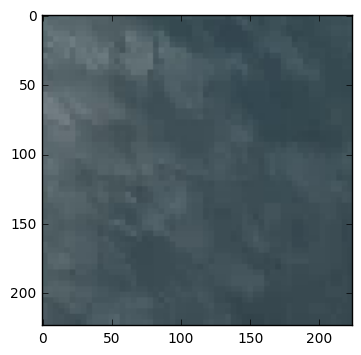

[(u'n03773504', u'missile', 0.067178227), (u'n04008634', u'projectile', 0.065383695), (u'n09288635', u'geyser', 0.053508662), (u'n02840245', u'binder', 0.046927784), (u'n04266014', u'space_shuttle', 0.038359862), (u'n02692877', u'airship', 0.035496127), (u'n03347037', u'fire_screen', 0.024700399), (u'n04525038', u'velvet', 0.02189544), (u'n02074367', u'dugong', 0.020511506), (u'n02066245', u'grey_whale', 0.018004127)]


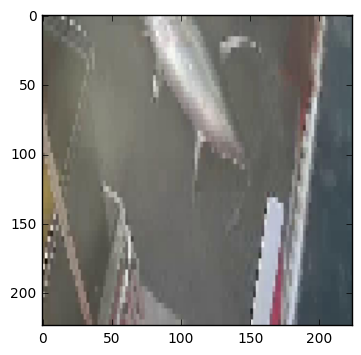

[(u'n03344393', u'fireboat', 0.85727996), (u'n02999410', u'chain', 0.019869184), (u'n02895154', u'breastplate', 0.018864628), (u'n04147183', u'schooner', 0.0084462678), (u'n04275548', u'spider_web', 0.0051935473), (u'n02641379', u'gar', 0.0050197272), (u'n04483307', u'trimaran', 0.0042818645), (u'n04552348', u'warplane', 0.0034715978), (u'n02640242', u'sturgeon', 0.0030159377), (u'n01773549', u'barn_spider', 0.002534094)]


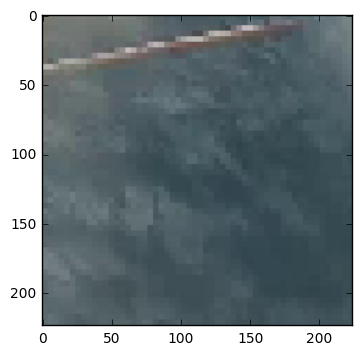

[(u'n09288635', u'geyser', 0.071790971), (u'n09399592', u'promontory', 0.064356573), (u'n04347754', u'submarine', 0.059148587), (u'n04311004', u'steel_arch_bridge', 0.028030368), (u'n03633091', u'ladle', 0.0235385), (u'n02687172', u'aircraft_carrier', 0.021950519), (u'n03344393', u'fireboat', 0.021260273), (u'n04606251', u'wreck', 0.01877274), (u'n03160309', u'dam', 0.018680817), (u'n03126707', u'crane', 0.018443303)]


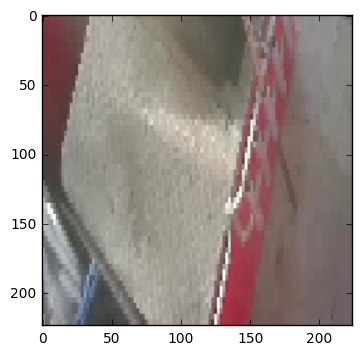

[(u'n04591157', u'Windsor_tie', 0.31156275), (u'n02834397', u'bib', 0.13662317), (u'n02895154', u'breastplate', 0.048771203), (u'n03485794', u'handkerchief', 0.047119398), (u'n03866082', u'overskirt', 0.027114525), (u'n03146219', u'cuirass', 0.026920522), (u'n03887697', u'paper_towel', 0.024742492), (u'n04599235', u'wool', 0.02087586), (u'n04208210', u'shovel', 0.020231619), (u'n03633091', u'ladle', 0.018304957)]


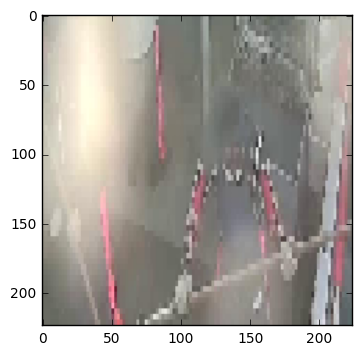

[(u'n03344393', u'fireboat', 0.90987676), (u'n09288635', u'geyser', 0.016482214), (u'n03388043', u'fountain', 0.014048326), (u'n04008634', u'projectile', 0.0068840836), (u'n03773504', u'missile', 0.0053002913), (u'n02895154', u'breastplate', 0.0047463859), (u'n04209239', u'shower_curtain', 0.0030978187), (u'n02815834', u'beaker', 0.0023607507), (u'n03062245', u'cocktail_shaker', 0.0023471166), (u'n02948072', u'candle', 0.0019721875)]


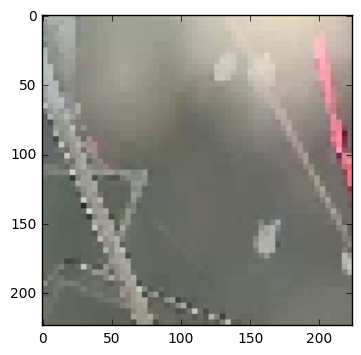

[(u'n02708093', u'analog_clock', 0.39162335), (u'n04552348', u'warplane', 0.12735251), (u'n02687172', u'aircraft_carrier', 0.087574191), (u'n02999410', u'chain', 0.061286315), (u'n03773504', u'missile', 0.05886966), (u'n04310018', u'steam_locomotive', 0.048713706), (u'n02825657', u'bell_cote', 0.017375892), (u'n04266014', u'space_shuttle', 0.015827088), (u'n03344393', u'fireboat', 0.015616343), (u'n04008634', u'projectile', 0.014216904)]


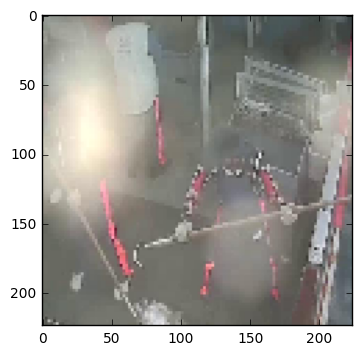

[(u'n03733805', u'measuring_cup', 0.45602024), (u'n02708093', u'analog_clock', 0.087090105), (u'n03344393', u'fireboat', 0.042229451), (u'n02895154', u'breastplate', 0.0241383), (u'n04111531', u'rotisserie', 0.019221244), (u'n04310018', u'steam_locomotive', 0.017395768), (u'n02815834', u'beaker', 0.01573479), (u'n03857828', u'oscilloscope', 0.014806185), (u'n03920288', u'Petri_dish', 0.012700257), (u'n04296562', u'stage', 0.011655161)]


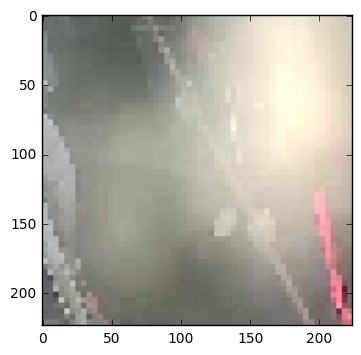

[(u'n03344393', u'fireboat', 0.5867157), (u'n03773504', u'missile', 0.19506496), (u'n04008634', u'projectile', 0.042531345), (u'n04310018', u'steam_locomotive', 0.028144954), (u'n03345487', u'fire_engine', 0.01143402), (u'n04252225', u'snowplow', 0.007449009), (u'n04266014', u'space_shuttle', 0.0071270117), (u'n09288635', u'geyser', 0.0069790022), (u'n04286575', u'spotlight', 0.0057946146), (u'n04552348', u'warplane', 0.0041867946)]


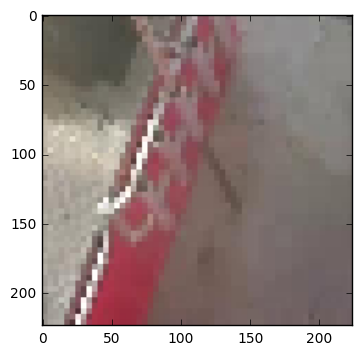

[(u'n03633091', u'ladle', 0.11922115), (u'n03627232', u'knot', 0.065070882), (u'n03908714', u'pencil_sharpener', 0.039377045), (u'n03495258', u'harp', 0.033062376), (u'n02999410', u'chain', 0.019607492), (u'n04423845', u'thimble', 0.019213693), (u'n03532672', u'hook', 0.017713891), (u'n02788148', u'bannister', 0.016145265), (u'n03291819', u'envelope', 0.015817337), (u'n03970156', u'plunger', 0.014745818)]


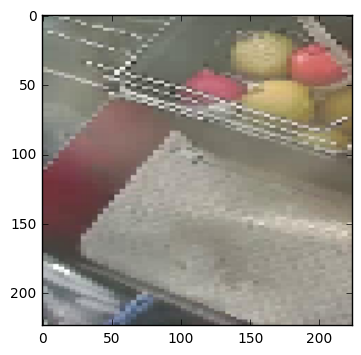

[(u'n03794056', u'mousetrap', 0.18617578), (u'n03602883', u'joystick', 0.067014396), (u'n03920288', u'Petri_dish', 0.041892488), (u'n03871628', u'packet', 0.034377959), (u'n03676483', u'lipstick', 0.023091881), (u'n03467068', u'guillotine', 0.021801719), (u'n02776631', u'bakery', 0.021615548), (u'n04372370', u'switch', 0.019222435), (u'n03201208', u'dining_table', 0.018638389), (u'n03544143', u'hourglass', 0.018140208)]


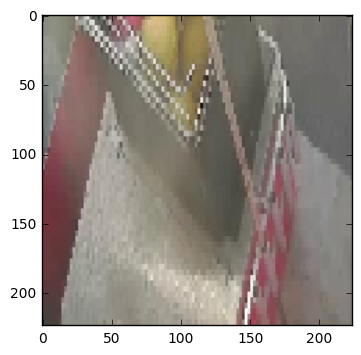

[(u'n04591157', u'Windsor_tie', 0.071770966), (u'n03344393', u'fireboat', 0.071020134), (u'n03871628', u'packet', 0.050836239), (u'n03450230', u'gown', 0.044802066), (u'n02667093', u'abaya', 0.042254325), (u'n02895154', u'breastplate', 0.036139958), (u'n04525038', u'velvet', 0.034673668), (u'n04532106', u'vestment', 0.029177863), (u'n03676483', u'lipstick', 0.025747238), (u'n03291819', u'envelope', 0.020765934)]


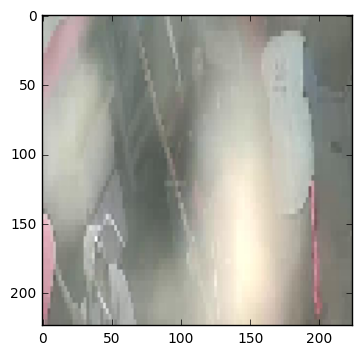

[(u'n03344393', u'fireboat', 0.68296748), (u'n09288635', u'geyser', 0.060772456), (u'n03388043', u'fountain', 0.04613705), (u'n03676483', u'lipstick', 0.030216729), (u'n03450230', u'gown', 0.01492898), (u'n02948072', u'candle', 0.011587228), (u'n03866082', u'overskirt', 0.010763508), (u'n04584207', u'wig', 0.0095081795), (u'n03534580', u'hoopskirt', 0.0055439882), (u'n03630383', u'lab_coat', 0.0052055623)]


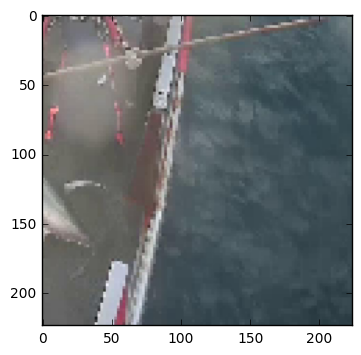

[(u'n03344393', u'fireboat', 0.43017849), (u'n03733805', u'measuring_cup', 0.14939596), (u'n04552348', u'warplane', 0.069491312), (u'n04483307', u'trimaran', 0.054667566), (u'n02687172', u'aircraft_carrier', 0.035203706), (u'n02895154', u'breastplate', 0.02155596), (u'n03871628', u'packet', 0.020046763), (u'n03062245', u'cocktail_shaker', 0.013156508), (u'n03095699', u'container_ship', 0.012692717), (u'n03673027', u'liner', 0.0067158942)]


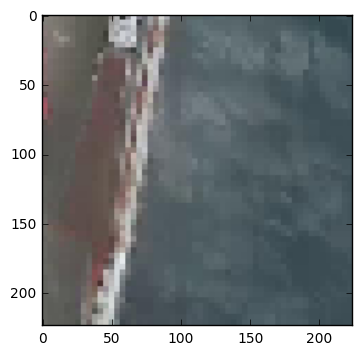

[(u'n03095699', u'container_ship', 0.32942435), (u'n02687172', u'aircraft_carrier', 0.052783325), (u'n03773504', u'missile', 0.037710454), (u'n03344393', u'fireboat', 0.031876769), (u'n03240683', u'drilling_platform', 0.029864514), (u'n04310018', u'steam_locomotive', 0.026433637), (u'n03673027', u'liner', 0.024412243), (u'n04532670', u'viaduct', 0.015968585), (u'n03467068', u'guillotine', 0.01498702), (u'n04347754', u'submarine', 0.013770284)]


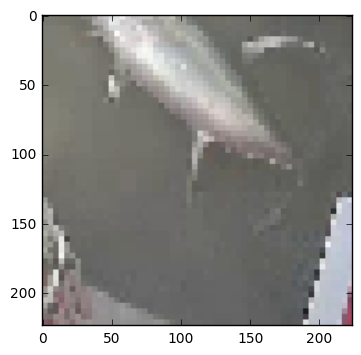

[(u'n03095699', u'container_ship', 0.22037098), (u'n04266014', u'space_shuttle', 0.18918231), (u'n02640242', u'sturgeon', 0.10648246), (u'n02687172', u'aircraft_carrier', 0.10017841), (u'n02692877', u'airship', 0.075302497), (u'n03673027', u'liner', 0.050471928), (u'n01494475', u'hammerhead', 0.046033029), (u'n03773504', u'missile', 0.036981732), (u'n02536864', u'coho', 0.035707317), (u'n02641379', u'gar', 0.025279311)]


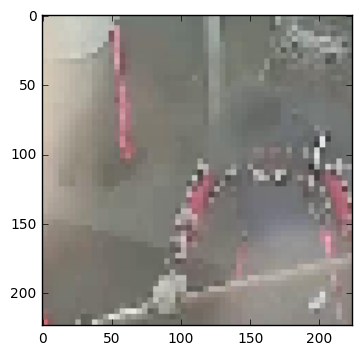

[(u'n03344393', u'fireboat', 0.26151511), (u'n03345487', u'fire_engine', 0.10762586), (u'n04310018', u'steam_locomotive', 0.062653378), (u'n04296562', u'stage', 0.038608864), (u'n02699494', u'altar', 0.027861629), (u'n03742115', u'medicine_chest', 0.026283527), (u'n03095699', u'container_ship', 0.020975338), (u'n04523525', u'vault', 0.020062592), (u'n02808440', u'bathtub', 0.011884579), (u'n03467068', u'guillotine', 0.011795797)]


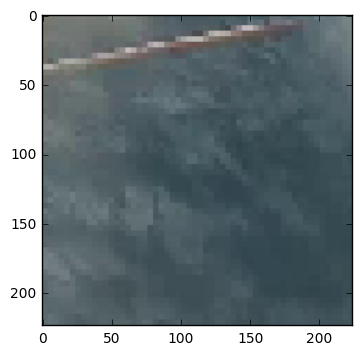

[(u'n09288635', u'geyser', 0.071790971), (u'n09399592', u'promontory', 0.064356573), (u'n04347754', u'submarine', 0.059148587), (u'n04311004', u'steel_arch_bridge', 0.028030368), (u'n03633091', u'ladle', 0.0235385), (u'n02687172', u'aircraft_carrier', 0.021950519), (u'n03344393', u'fireboat', 0.021260273), (u'n04606251', u'wreck', 0.01877274), (u'n03160309', u'dam', 0.018680817), (u'n03126707', u'crane', 0.018443303)]


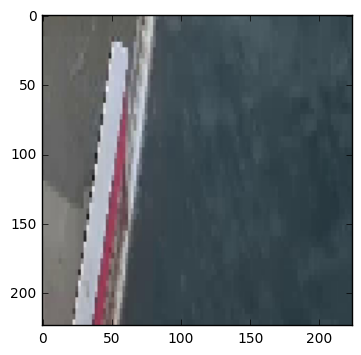

[(u'n02840245', u'binder', 0.099989966), (u'n03467068', u'guillotine', 0.097250283), (u'n02687172', u'aircraft_carrier', 0.047554921), (u'n04589890', u'window_screen', 0.038445592), (u'n04258138', u'solar_dish', 0.032642681), (u'n03291819', u'envelope', 0.02449641), (u'n04367480', u'swab', 0.016390949), (u'n07248320', u'book_jacket', 0.016174169), (u'n04209239', u'shower_curtain', 0.016023917), (u'n03742115', u'medicine_chest', 0.014854665)]


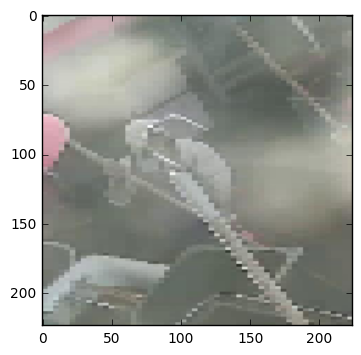

[(u'n04275548', u'spider_web', 0.20516293), (u'n03344393', u'fireboat', 0.13226174), (u'n03733805', u'measuring_cup', 0.082583576), (u'n01773549', u'barn_spider', 0.058201883), (u'n02229544', u'cricket', 0.050281078), (u'n02165105', u'tiger_beetle', 0.024989419), (u'n04552348', u'warplane', 0.023103822), (u'n02999410', u'chain', 0.020705994), (u'n02226429', u'grasshopper', 0.019384418), (u'n04525038', u'velvet', 0.014881716)]


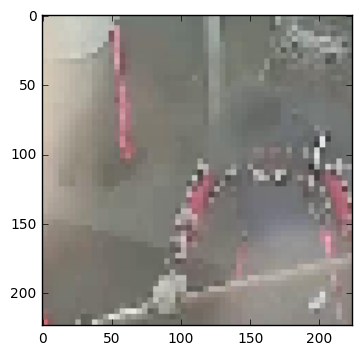

[(u'n03344393', u'fireboat', 0.26151511), (u'n03345487', u'fire_engine', 0.10762586), (u'n04310018', u'steam_locomotive', 0.062653378), (u'n04296562', u'stage', 0.038608864), (u'n02699494', u'altar', 0.027861629), (u'n03742115', u'medicine_chest', 0.026283527), (u'n03095699', u'container_ship', 0.020975338), (u'n04523525', u'vault', 0.020062592), (u'n02808440', u'bathtub', 0.011884579), (u'n03467068', u'guillotine', 0.011795797)]


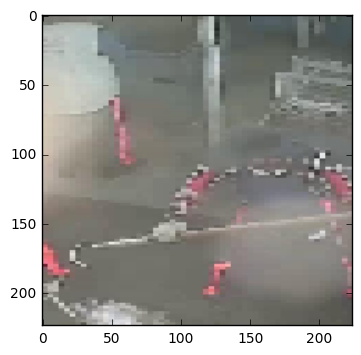

[(u'n03344393', u'fireboat', 0.39928758), (u'n03095699', u'container_ship', 0.030805746), (u'n02815834', u'beaker', 0.02133346), (u'n03920288', u'Petri_dish', 0.01548014), (u'n04310018', u'steam_locomotive', 0.014317103), (u'n03345487', u'fire_engine', 0.013440986), (u'n03773504', u'missile', 0.013362679), (u'n03126707', u'crane', 0.012662496), (u'n03733805', u'measuring_cup', 0.01190517), (u'n04376876', u'syringe', 0.011351188)]


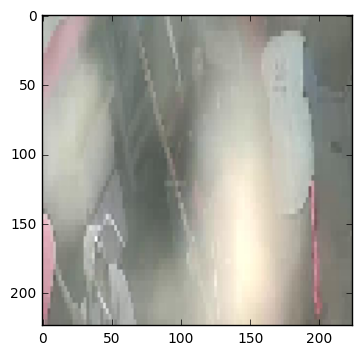

[(u'n03344393', u'fireboat', 0.68296748), (u'n09288635', u'geyser', 0.060772456), (u'n03388043', u'fountain', 0.04613705), (u'n03676483', u'lipstick', 0.030216729), (u'n03450230', u'gown', 0.01492898), (u'n02948072', u'candle', 0.011587228), (u'n03866082', u'overskirt', 0.010763508), (u'n04584207', u'wig', 0.0095081795), (u'n03534580', u'hoopskirt', 0.0055439882), (u'n03630383', u'lab_coat', 0.0052055623)]


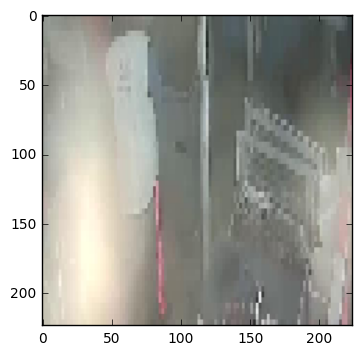

[(u'n03344393', u'fireboat', 0.31990147), (u'n09288635', u'geyser', 0.20986734), (u'n03773504', u'missile', 0.20090337), (u'n04008634', u'projectile', 0.093239598), (u'n03388043', u'fountain', 0.090671942), (u'n04266014', u'space_shuttle', 0.010941041), (u'n02815834', u'beaker', 0.0092749028), (u'n02977058', u'cash_machine', 0.0057598515), (u'n07248320', u'book_jacket', 0.0045248847), (u'n03825788', u'nipple', 0.0027436139)]


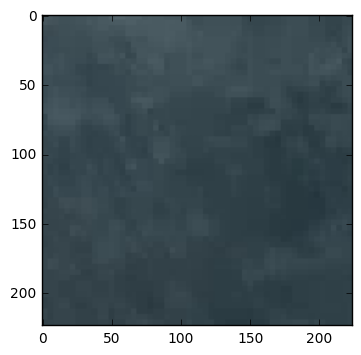

[(u'n04008634', u'projectile', 0.056550346), (u'n03773504', u'missile', 0.055641714), (u'n09288635', u'geyser', 0.052836291), (u'n02840245', u'binder', 0.029999925), (u'n02692877', u'airship', 0.026012091), (u'n04266014', u'space_shuttle', 0.025984544), (u'n03633091', u'ladle', 0.020782124), (u'n02066245', u'grey_whale', 0.019788494), (u'n03535780', u'horizontal_bar', 0.016903453), (u'n02782093', u'balloon', 0.016539527)]


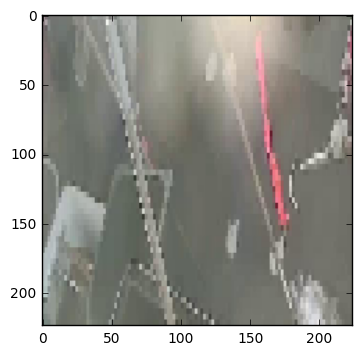

[(u'n03344393', u'fireboat', 0.70012981), (u'n02999410', u'chain', 0.0618679), (u'n02667093', u'abaya', 0.050689958), (u'n04275548', u'spider_web', 0.018019821), (u'n03388043', u'fountain', 0.010488455), (u'n04209239', u'shower_curtain', 0.010326786), (u'n02892767', u'brassiere', 0.0084210979), (u'n04552348', u'warplane', 0.0068203704), (u'n03045698', u'cloak', 0.0060712765), (u'n02895154', u'breastplate', 0.0039699492)]


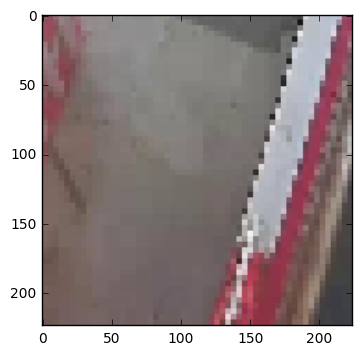

[(u'n03633091', u'ladle', 0.072750285), (u'n03495258', u'harp', 0.058705971), (u'n04153751', u'screw', 0.057868458), (u'n03908714', u'pencil_sharpener', 0.055241771), (u'n03804744', u'nail', 0.054279007), (u'n04367480', u'swab', 0.043621935), (u'n03532672', u'hook', 0.039506499), (u'n02840245', u'binder', 0.035354495), (u'n03467068', u'guillotine', 0.034751188), (u'n02999410', u'chain', 0.033883415)]


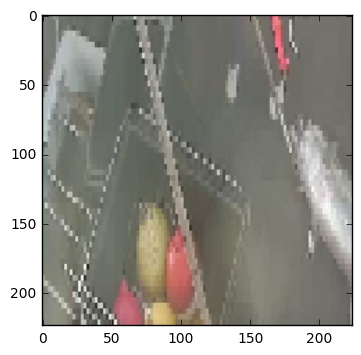

[(u'n03344393', u'fireboat', 0.12625511), (u'n02999410', u'chain', 0.11145253), (u'n01773549', u'barn_spider', 0.069248997), (u'n03773504', u'missile', 0.069113016), (u'n04275548', u'spider_web', 0.064098865), (u'n01773157', u'black_and_gold_garden_spider', 0.046187572), (u'n02667093', u'abaya', 0.039599758), (u'n04209239', u'shower_curtain', 0.022466542), (u'n04552348', u'warplane', 0.019320143), (u'n03814906', u'necklace', 0.016941631)]


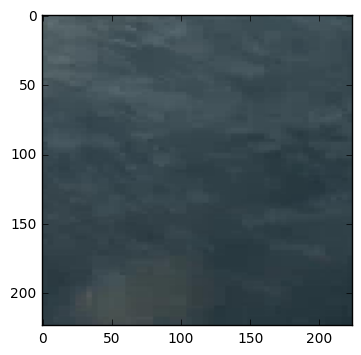

[(u'n04008634', u'projectile', 0.060699943), (u'n03773504', u'missile', 0.057304762), (u'n03535780', u'horizontal_bar', 0.041132156), (u'n03240683', u'drilling_platform', 0.038911957), (u'n02840245', u'binder', 0.028160874), (u'n02777292', u'balance_beam', 0.027838737), (u'n02071294', u'killer_whale', 0.02734834), (u'n04525038', u'velvet', 0.024220126), (u'n02692877', u'airship', 0.02323279), (u'n03888605', u'parallel_bars', 0.017562736)]


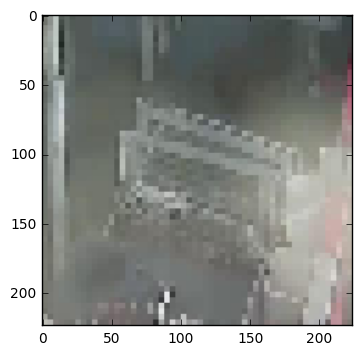

[(u'n03467068', u'guillotine', 0.13962698), (u'n03902125', u'pay-phone', 0.084422424), (u'n02977058', u'cash_machine', 0.063420042), (u'n03742115', u'medicine_chest', 0.053940278), (u'n04589890', u'window_screen', 0.040180922), (u'n03857828', u'oscilloscope', 0.032297764), (u'n04296562', u'stage', 0.025986223), (u'n04111531', u'rotisserie', 0.025541937), (u'n02808440', u'bathtub', 0.022367647), (u'n03347037', u'fire_screen', 0.021700803)]


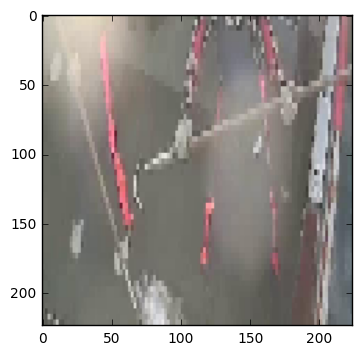

[(u'n03344393', u'fireboat', 0.42961583), (u'n02895154', u'breastplate', 0.076281331), (u'n02892767', u'brassiere', 0.037020754), (u'n03764736', u'milk_can', 0.031369377), (u'n03146219', u'cuirass', 0.022109834), (u'n03017168', u'chime', 0.019634189), (u'n03467068', u'guillotine', 0.017126068), (u'n02747177', u'ashcan', 0.016707238), (u'n02999410', u'chain', 0.016469721), (u'n02948072', u'candle', 0.010119656)]


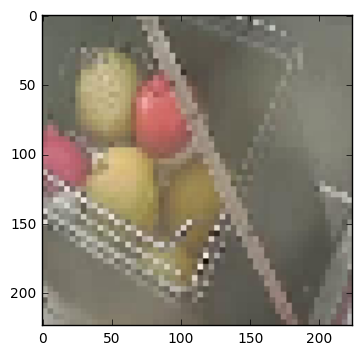

[(u'n03676483', u'lipstick', 0.55204105), (u'n02948072', u'candle', 0.11290343), (u'n03291819', u'envelope', 0.02567495), (u'n03920288', u'Petri_dish', 0.02232204), (u'n03733805', u'measuring_cup', 0.014456325), (u'n03314780', u'face_powder', 0.011930593), (u'n04116512', u'rubber_eraser', 0.010026447), (u'n03814906', u'necklace', 0.0095351795), (u'n03095699', u'container_ship', 0.008697846), (u'n03485794', u'handkerchief', 0.0072619254)]


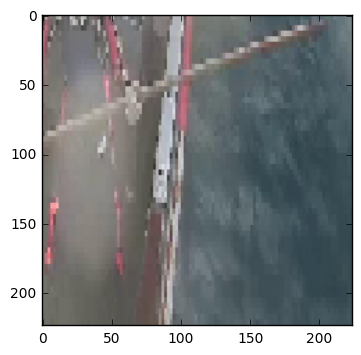

[(u'n04005630', u'prison', 0.25152355), (u'n03467068', u'guillotine', 0.12489869), (u'n03344393', u'fireboat', 0.12107282), (u'n04125021', u'safe', 0.064854115), (u'n03976657', u'pole', 0.026279647), (u'n03127925', u'crate', 0.024521397), (u'n04310018', u'steam_locomotive', 0.022508474), (u'n02481823', u'chimpanzee', 0.01775457), (u'n04604644', u'worm_fence', 0.015681202), (u'n03535780', u'horizontal_bar', 0.014929632)]


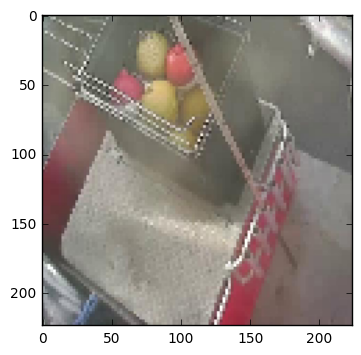

[(u'n03871628', u'packet', 0.11366782), (u'n02948072', u'candle', 0.11067811), (u'n04141975', u'scale', 0.086891301), (u'n01773549', u'barn_spider', 0.084276713), (u'n02999410', u'chain', 0.047735695), (u'n03794056', u'mousetrap', 0.029974271), (u'n03485794', u'handkerchief', 0.019242091), (u'n03291819', u'envelope', 0.017122775), (u'n04423845', u'thimble', 0.015435068), (u'n03944341', u'pinwheel', 0.012450136)]


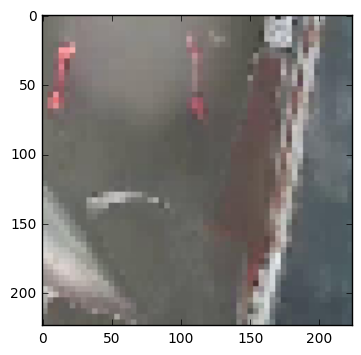

[(u'n03344393', u'fireboat', 0.19948013), (u'n03095699', u'container_ship', 0.11175153), (u'n04310018', u'steam_locomotive', 0.079317413), (u'n03496892', u'harvester', 0.030938236), (u'n02895154', u'breastplate', 0.030420816), (u'n03345487', u'fire_engine', 0.026779242), (u'n02916936', u'bulletproof_vest', 0.026515963), (u'n03146219', u'cuirass', 0.024069481), (u'n04252225', u'snowplow', 0.021200879), (u'n03773504', u'missile', 0.015795648)]


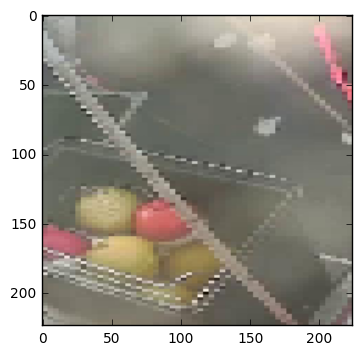

[(u'n03344393', u'fireboat', 0.16285662), (u'n03920288', u'Petri_dish', 0.10514418), (u'n03602883', u'joystick', 0.046265334), (u'n04275548', u'spider_web', 0.044519529), (u'n02999410', u'chain', 0.032327376), (u'n07584110', u'consomme', 0.030500326), (u'n04141975', u'scale', 0.028977714), (u'n02948072', u'candle', 0.025979655), (u'n03733805', u'measuring_cup', 0.025494637), (u'n04152593', u'screen', 0.020650255)]


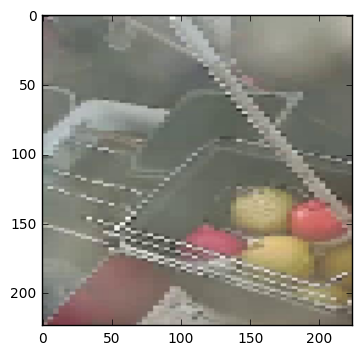

[(u'n03920288', u'Petri_dish', 0.089262187), (u'n03733805', u'measuring_cup', 0.08718171), (u'n03344393', u'fireboat', 0.052688304), (u'n03602883', u'joystick', 0.043436337), (u'n02776631', u'bakery', 0.042364452), (u'n04141975', u'scale', 0.036124632), (u'n02999410', u'chain', 0.027410649), (u'n04275548', u'spider_web', 0.019659391), (u'n04552348', u'warplane', 0.018032584), (u'n03794056', u'mousetrap', 0.016404079)]


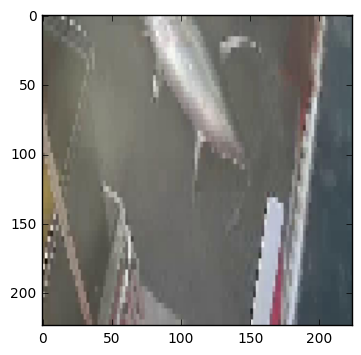

[(u'n03344393', u'fireboat', 0.85727996), (u'n02999410', u'chain', 0.019869184), (u'n02895154', u'breastplate', 0.018864628), (u'n04147183', u'schooner', 0.0084462678), (u'n04275548', u'spider_web', 0.0051935473), (u'n02641379', u'gar', 0.0050197272), (u'n04483307', u'trimaran', 0.0042818645), (u'n04552348', u'warplane', 0.0034715978), (u'n02640242', u'sturgeon', 0.0030159377), (u'n01773549', u'barn_spider', 0.002534094)]


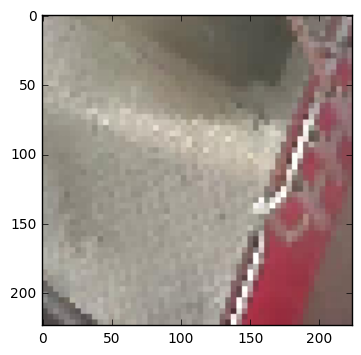

[(u'n03633091', u'ladle', 0.16929375), (u'n04525038', u'velvet', 0.086879916), (u'n03485794', u'handkerchief', 0.070387222), (u'n02834397', u'bib', 0.060927991), (u'n03291819', u'envelope', 0.034335677), (u'n04332243', u'strainer', 0.028880097), (u'n02999410', u'chain', 0.021387288), (u'n02892767', u'brassiere', 0.021085409), (u'n03908714', u'pencil_sharpener', 0.01937552), (u'n04591157', u'Windsor_tie', 0.016943175)]


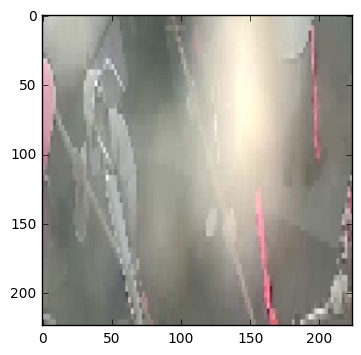

[(u'n03344393', u'fireboat', 0.93306583), (u'n02892767', u'brassiere', 0.0072953459), (u'n03676483', u'lipstick', 0.0064004059), (u'n02948072', u'candle', 0.0046469918), (u'n03773504', u'missile', 0.0028405369), (u'n03388043', u'fountain', 0.002515927), (u'n09288635', u'geyser', 0.001930515), (u'n03450230', u'gown', 0.0017372458), (u'n04008634', u'projectile', 0.0013130914), (u'n10148035', u'groom', 0.0012547745)]


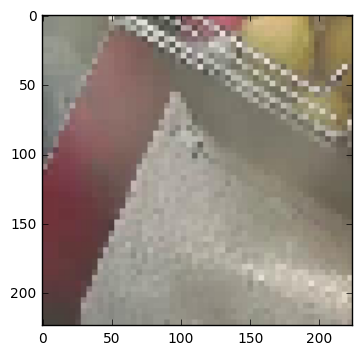

[(u'n03291819', u'envelope', 0.12276297), (u'n03908714', u'pencil_sharpener', 0.091448903), (u'n03676483', u'lipstick', 0.036776315), (u'n03637318', u'lampshade', 0.032351941), (u'n03485794', u'handkerchief', 0.023793308), (u'n03854065', u'organ', 0.022402417), (u'n03602883', u'joystick', 0.021717312), (u'n02895154', u'breastplate', 0.02098646), (u'n03871628', u'packet', 0.02034382), (u'n04346328', u'stupa', 0.018801112)]


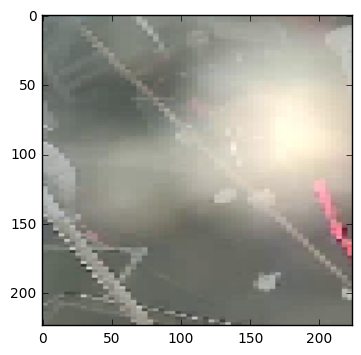

[(u'n02708093', u'analog_clock', 0.36400658), (u'n04552348', u'warplane', 0.11175751), (u'n03344393', u'fireboat', 0.090123124), (u'n03773504', u'missile', 0.089004718), (u'n04275548', u'spider_web', 0.066569716), (u'n02687172', u'aircraft_carrier', 0.019924439), (u'n04548280', u'wall_clock', 0.016458472), (u'n01773549', u'barn_spider', 0.016452909), (u'n04310018', u'steam_locomotive', 0.015749848), (u'n04008634', u'projectile', 0.013038641)]


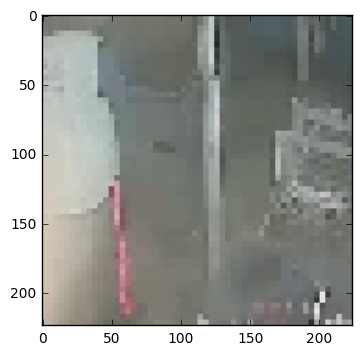

[(u'n03773504', u'missile', 0.18247718), (u'n02977058', u'cash_machine', 0.052727852), (u'n03344393', u'fireboat', 0.050880957), (u'n04310018', u'steam_locomotive', 0.043713696), (u'n04008634', u'projectile', 0.04013009), (u'n03976657', u'pole', 0.024882587), (u'n03467068', u'guillotine', 0.023576418), (u'n03857828', u'oscilloscope', 0.019357271), (u'n03924679', u'photocopier', 0.013280029), (u'n02815834', u'beaker', 0.012888311)]


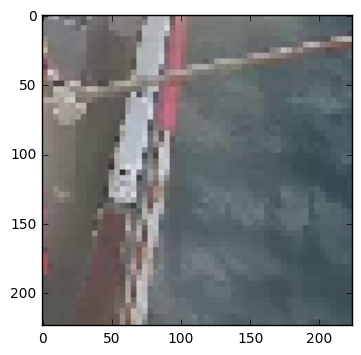

[(u'n03095699', u'container_ship', 0.12174971), (u'n03535780', u'horizontal_bar', 0.084674008), (u'n03976657', u'pole', 0.078091472), (u'n04366367', u'suspension_bridge', 0.063778624), (u'n04311004', u'steel_arch_bridge', 0.061864313), (u'n03344393', u'fireboat', 0.059562627), (u'n03888605', u'parallel_bars', 0.057720415), (u'n04532670', u'viaduct', 0.039586045), (u'n03933933', u'pier', 0.032394141), (u'n04258138', u'solar_dish', 0.017058266)]


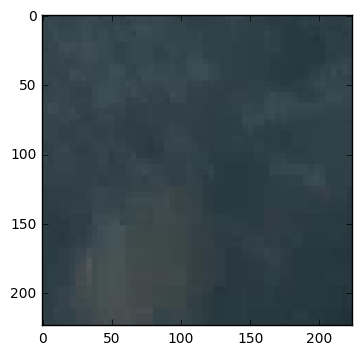

[(u'n03773504', u'missile', 0.10843369), (u'n09288635', u'geyser', 0.088386029), (u'n04008634', u'projectile', 0.053753361), (u'n02692877', u'airship', 0.032712709), (u'n04266014', u'space_shuttle', 0.029779376), (u'n01608432', u'kite', 0.028362306), (u'n03888257', u'parachute', 0.019909857), (u'n02782093', u'balloon', 0.019649854), (u'n09472597', u'volcano', 0.019584393), (u'n02002724', u'black_stork', 0.018307358)]


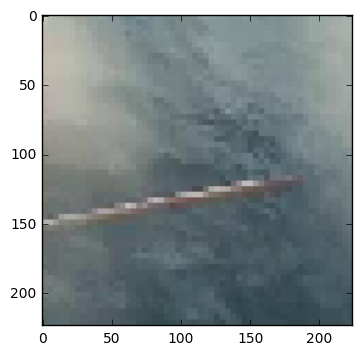

[(u'n09288635', u'geyser', 0.8104701), (u'n09472597', u'volcano', 0.029630216), (u'n01630670', u'common_newt', 0.019977503), (u'n02268853', u'damselfly', 0.016391857), (u'n02641379', u'gar', 0.0099806907), (u'n02066245', u'grey_whale', 0.0053886324), (u'n04347754', u'submarine', 0.0050048558), (u'n01685808', u'whiptail', 0.0043532625), (u'n01496331', u'electric_ray', 0.0043379762), (u'n03633091', u'ladle', 0.0041682217)]


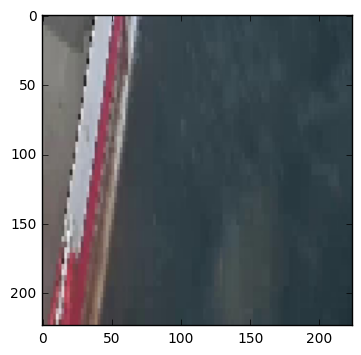

[(u'n02840245', u'binder', 0.43845826), (u'n03291819', u'envelope', 0.038085178), (u'n07248320', u'book_jacket', 0.031170614), (u'n03495258', u'harp', 0.025173785), (u'n03467068', u'guillotine', 0.019776285), (u'n04367480', u'swab', 0.016105423), (u'n04525038', u'velvet', 0.013846215), (u'n02817516', u'bearskin', 0.010717133), (u'n03908714', u'pencil_sharpener', 0.010265768), (u'n04548362', u'wallet', 0.0092779705)]


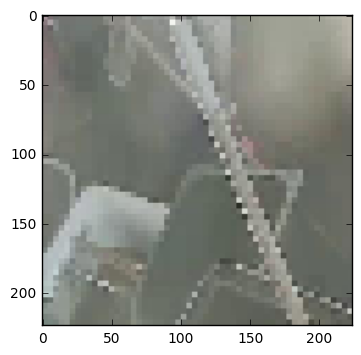

[(u'n02229544', u'cricket', 0.36674061), (u'n02226429', u'grasshopper', 0.15692027), (u'n02999410', u'chain', 0.042223562), (u'n01985128', u'crayfish', 0.03198541), (u'n03063689', u'coffeepot', 0.025949603), (u'n01773157', u'black_and_gold_garden_spider', 0.020720875), (u'n04099969', u'rocking_chair', 0.020199571), (u'n02231487', u'walking_stick', 0.01823237), (u'n01751748', u'sea_snake', 0.015760357), (u'n03344393', u'fireboat', 0.015471206)]


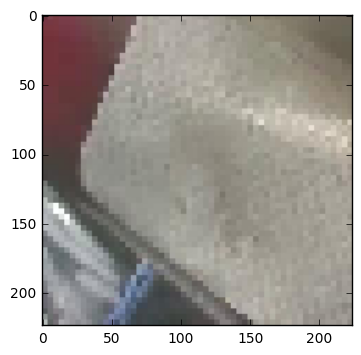

[(u'n15075141', u'toilet_tissue', 0.19989325), (u'n03887697', u'paper_towel', 0.11557779), (u'n04162706', u'seat_belt', 0.069864847), (u'n03041632', u'cleaver', 0.033695865), (u'n03485794', u'handkerchief', 0.033124741), (u'n04208210', u'shovel', 0.02898572), (u'n03291819', u'envelope', 0.028867263), (u'n03871628', u'packet', 0.025176387), (u'n03026506', u'Christmas_stocking', 0.021229209), (u'n04525038', u'velvet', 0.01384315)]


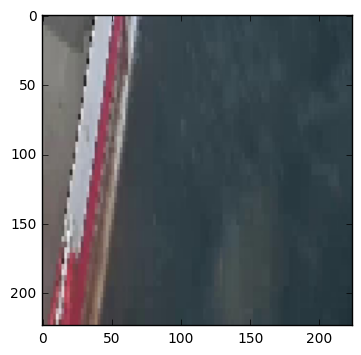

[(u'n02840245', u'binder', 0.43845826), (u'n03291819', u'envelope', 0.038085178), (u'n07248320', u'book_jacket', 0.031170614), (u'n03495258', u'harp', 0.025173785), (u'n03467068', u'guillotine', 0.019776285), (u'n04367480', u'swab', 0.016105423), (u'n04525038', u'velvet', 0.013846215), (u'n02817516', u'bearskin', 0.010717133), (u'n03908714', u'pencil_sharpener', 0.010265768), (u'n04548362', u'wallet', 0.0092779705)]


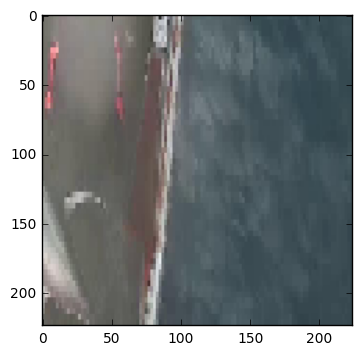

[(u'n03344393', u'fireboat', 0.15421285), (u'n03467068', u'guillotine', 0.15120111), (u'n04125021', u'safe', 0.052312043), (u'n02895154', u'breastplate', 0.027901724), (u'n03902125', u'pay-phone', 0.024253845), (u'n04147183', u'schooner', 0.019222982), (u'n04483307', u'trimaran', 0.016900599), (u'n03062245', u'cocktail_shaker', 0.013602878), (u'n04367480', u'swab', 0.012888222), (u'n02999410', u'chain', 0.012518736)]


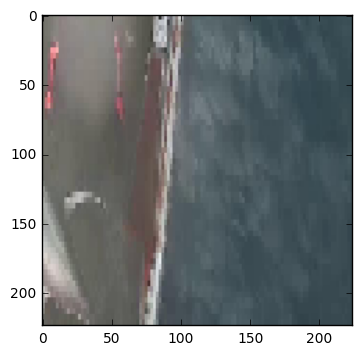

[(u'n03344393', u'fireboat', 0.15421285), (u'n03467068', u'guillotine', 0.15120111), (u'n04125021', u'safe', 0.052312043), (u'n02895154', u'breastplate', 0.027901724), (u'n03902125', u'pay-phone', 0.024253845), (u'n04147183', u'schooner', 0.019222982), (u'n04483307', u'trimaran', 0.016900599), (u'n03062245', u'cocktail_shaker', 0.013602878), (u'n04367480', u'swab', 0.012888222), (u'n02999410', u'chain', 0.012518736)]


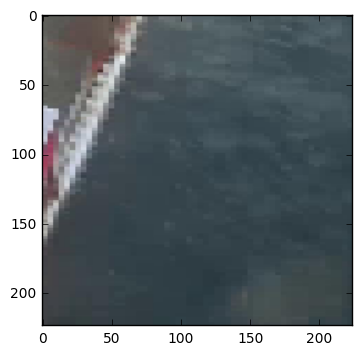

[(u'n02687172', u'aircraft_carrier', 0.57621235), (u'n03095699', u'container_ship', 0.15587682), (u'n03673027', u'liner', 0.03282173), (u'n03773504', u'missile', 0.024824962), (u'n02814860', u'beacon', 0.013612352), (u'n03344393', u'fireboat', 0.010243681), (u'n04266014', u'space_shuttle', 0.0080448333), (u'n02840245', u'binder', 0.0076576672), (u'n03884397', u'panpipe', 0.0066193868), (u'n04008634', u'projectile', 0.0063077328)]


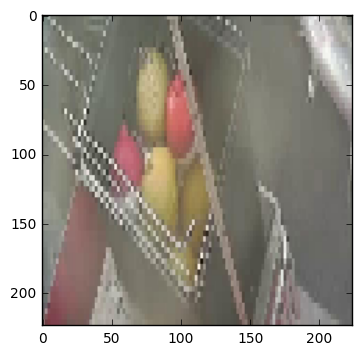

[(u'n03676483', u'lipstick', 0.12694366), (u'n03344393', u'fireboat', 0.07802096), (u'n07753275', u'pineapple', 0.071576394), (u'n02999410', u'chain', 0.058803715), (u'n01773157', u'black_and_gold_garden_spider', 0.056960497), (u'n04275548', u'spider_web', 0.054715876), (u'n01773549', u'barn_spider', 0.046647884), (u'n04116512', u'rubber_eraser', 0.043030087), (u'n02667093', u'abaya', 0.034496531), (u'n04118776', u'rule', 0.031739108)]


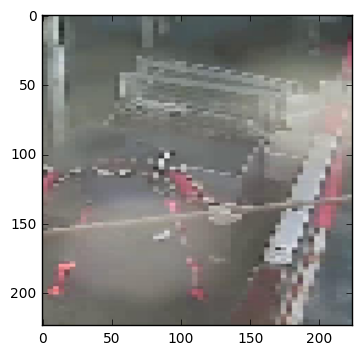

[(u'n03344393', u'fireboat', 0.2700119), (u'n03095699', u'container_ship', 0.11694694), (u'n02782093', u'balloon', 0.038023401), (u'n04149813', u'scoreboard', 0.034566451), (u'n03733805', u'measuring_cup', 0.028581548), (u'n04296562', u'stage', 0.021395866), (u'n03733281', u'maze', 0.018615413), (u'n04310018', u'steam_locomotive', 0.018189441), (u'n03673027', u'liner', 0.018066274), (u'n03920288', u'Petri_dish', 0.014710269)]


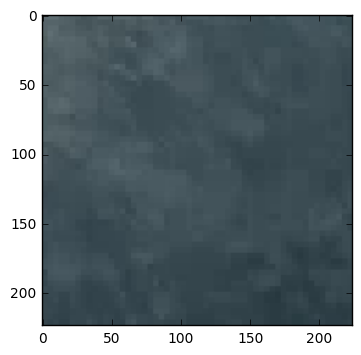

[(u'n02840245', u'binder', 0.065622292), (u'n03773504', u'missile', 0.056955379), (u'n04008634', u'projectile', 0.0529439), (u'n09288635', u'geyser', 0.04413313), (u'n04266014', u'space_shuttle', 0.028115585), (u'n03347037', u'fire_screen', 0.027636858), (u'n02692877', u'airship', 0.022833701), (u'n02074367', u'dugong', 0.019391743), (u'n02066245', u'grey_whale', 0.019112881), (u'n01930112', u'nematode', 0.018331818)]


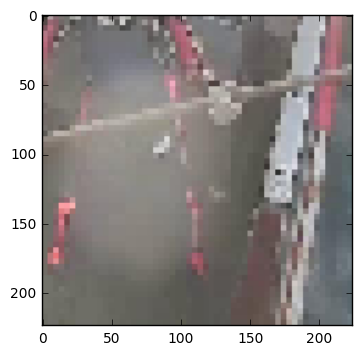

[(u'n03095699', u'container_ship', 0.40598622), (u'n03344393', u'fireboat', 0.11498643), (u'n03345487', u'fire_engine', 0.052343249), (u'n04310018', u'steam_locomotive', 0.04174985), (u'n03467068', u'guillotine', 0.019138286), (u'n03496892', u'harvester', 0.016871264), (u'n03127925', u'crate', 0.015007637), (u'n03874293', u'paddlewheel', 0.014829526), (u'n03733281', u'maze', 0.012173263), (u'n04125021', u'safe', 0.010949862)]


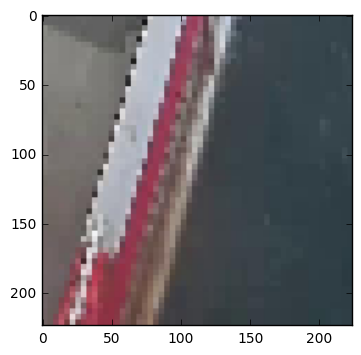

[(u'n03908714', u'pencil_sharpener', 0.17088245), (u'n03467068', u'guillotine', 0.14527106), (u'n03495258', u'harp', 0.054584112), (u'n03633091', u'ladle', 0.047504071), (u'n03794056', u'mousetrap', 0.035206158), (u'n02840245', u'binder', 0.029612705), (u'n04153751', u'screw', 0.028969949), (u'n02788148', u'bannister', 0.023858385), (u'n03291819', u'envelope', 0.017597137), (u'n04367480', u'swab', 0.017575763)]


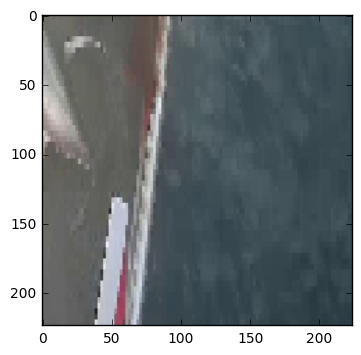

[(u'n03467068', u'guillotine', 0.12212051), (u'n03344393', u'fireboat', 0.080044903), (u'n04258138', u'solar_dish', 0.044988822), (u'n04147183', u'schooner', 0.044081438), (u'n04589890', u'window_screen', 0.027451761), (u'n04483307', u'trimaran', 0.027191075), (u'n02481823', u'chimpanzee', 0.017771605), (u'n02687172', u'aircraft_carrier', 0.017707158), (u'n04040759', u'radiator', 0.017637124), (u'n02895154', u'breastplate', 0.016022773)]


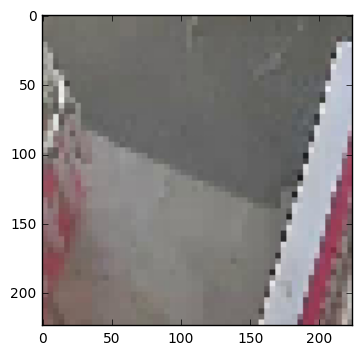

[(u'n03673027', u'liner', 0.11992356), (u'n03095699', u'container_ship', 0.099908382), (u'n02687172', u'aircraft_carrier', 0.080678664), (u'n03773504', u'missile', 0.076947421), (u'n03291819', u'envelope', 0.057611831), (u'n02692877', u'airship', 0.036871549), (u'n03884397', u'panpipe', 0.036359575), (u'n04346328', u'stupa', 0.026621787), (u'n03908714', u'pencil_sharpener', 0.025182609), (u'n04266014', u'space_shuttle', 0.022551201)]


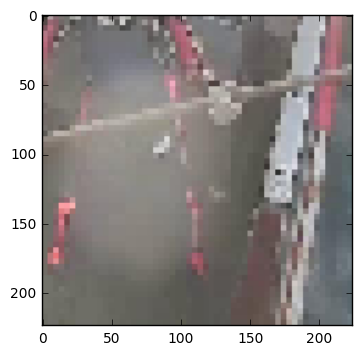

[(u'n03095699', u'container_ship', 0.40598622), (u'n03344393', u'fireboat', 0.11498643), (u'n03345487', u'fire_engine', 0.052343249), (u'n04310018', u'steam_locomotive', 0.04174985), (u'n03467068', u'guillotine', 0.019138286), (u'n03496892', u'harvester', 0.016871264), (u'n03127925', u'crate', 0.015007637), (u'n03874293', u'paddlewheel', 0.014829526), (u'n03733281', u'maze', 0.012173263), (u'n04125021', u'safe', 0.010949862)]


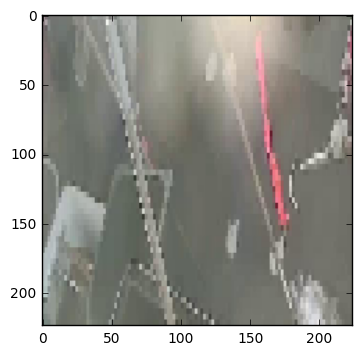

[(u'n03344393', u'fireboat', 0.70012981), (u'n02999410', u'chain', 0.0618679), (u'n02667093', u'abaya', 0.050689958), (u'n04275548', u'spider_web', 0.018019821), (u'n03388043', u'fountain', 0.010488455), (u'n04209239', u'shower_curtain', 0.010326786), (u'n02892767', u'brassiere', 0.0084210979), (u'n04552348', u'warplane', 0.0068203704), (u'n03045698', u'cloak', 0.0060712765), (u'n02895154', u'breastplate', 0.0039699492)]


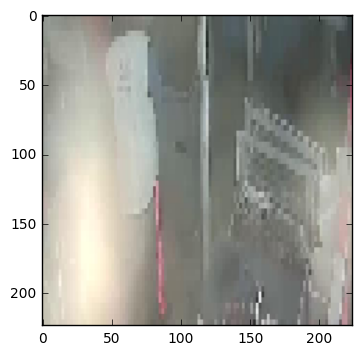

[(u'n03344393', u'fireboat', 0.31990147), (u'n09288635', u'geyser', 0.20986734), (u'n03773504', u'missile', 0.20090337), (u'n04008634', u'projectile', 0.093239598), (u'n03388043', u'fountain', 0.090671942), (u'n04266014', u'space_shuttle', 0.010941041), (u'n02815834', u'beaker', 0.0092749028), (u'n02977058', u'cash_machine', 0.0057598515), (u'n07248320', u'book_jacket', 0.0045248847), (u'n03825788', u'nipple', 0.0027436139)]


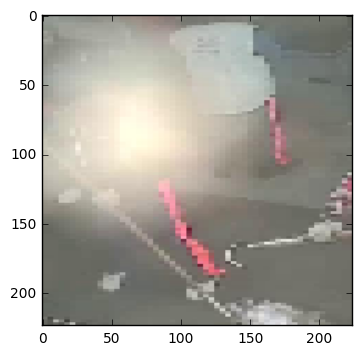

[(u'n02708093', u'analog_clock', 0.33391842), (u'n02687172', u'aircraft_carrier', 0.11390109), (u'n03344393', u'fireboat', 0.092228219), (u'n03773504', u'missile', 0.081067964), (u'n04552348', u'warplane', 0.042575568), (u'n04548280', u'wall_clock', 0.031178866), (u'n04008634', u'projectile', 0.028784784), (u'n04310018', u'steam_locomotive', 0.025232878), (u'n02950826', u'cannon', 0.021588909), (u'n04266014', u'space_shuttle', 0.013676768)]


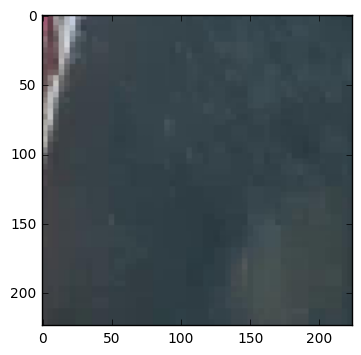

[(u'n03773504', u'missile', 0.041183483), (u'n02840245', u'binder', 0.035286725), (u'n02814860', u'beacon', 0.033478279), (u'n02977058', u'cash_machine', 0.025850207), (u'n04266014', u'space_shuttle', 0.01732281), (u'n04147183', u'schooner', 0.016698435), (u'n03467068', u'guillotine', 0.016076183), (u'n09288635', u'geyser', 0.015372734), (u'n03344393', u'fireboat', 0.014632277), (u'n03240683', u'drilling_platform', 0.01329685)]


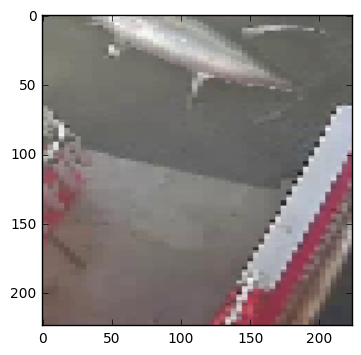

[(u'n02640242', u'sturgeon', 0.34405017), (u'n02641379', u'gar', 0.34242624), (u'n02692877', u'airship', 0.075044438), (u'n02690373', u'airliner', 0.030798294), (u'n02687172', u'aircraft_carrier', 0.019772632), (u'n04008634', u'projectile', 0.017775957), (u'n01494475', u'hammerhead', 0.015385195), (u'n03773504', u'missile', 0.012350632), (u'n01491361', u'tiger_shark', 0.012221396), (u'n04552348', u'warplane', 0.012157952)]


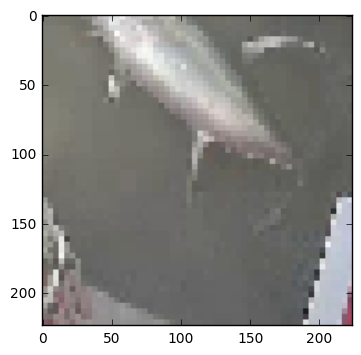

[(u'n03095699', u'container_ship', 0.22037098), (u'n04266014', u'space_shuttle', 0.18918231), (u'n02640242', u'sturgeon', 0.10648246), (u'n02687172', u'aircraft_carrier', 0.10017841), (u'n02692877', u'airship', 0.075302497), (u'n03673027', u'liner', 0.050471928), (u'n01494475', u'hammerhead', 0.046033029), (u'n03773504', u'missile', 0.036981732), (u'n02536864', u'coho', 0.035707317), (u'n02641379', u'gar', 0.025279311)]


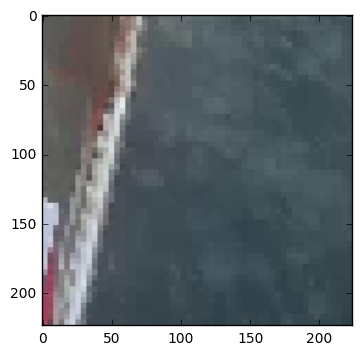

[(u'n03633091', u'ladle', 0.066948049), (u'n02840245', u'binder', 0.062334754), (u'n03095699', u'container_ship', 0.045870855), (u'n02687172', u'aircraft_carrier', 0.044598948), (u'n03773504', u'missile', 0.034032404), (u'n02865351', u'bolo_tie', 0.023313886), (u'n02895154', u'breastplate', 0.021831583), (u'n07248320', u'book_jacket', 0.019434225), (u'n03884397', u'panpipe', 0.015830854), (u'n03146219', u'cuirass', 0.015684666)]


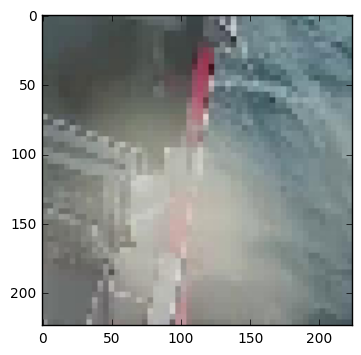

[(u'n03773504', u'missile', 0.77043605), (u'n04008634', u'projectile', 0.21375228), (u'n04266014', u'space_shuttle', 0.0037300822), (u'n03976657', u'pole', 0.0027057773), (u'n03344393', u'fireboat', 0.0015228143), (u'n03535780', u'horizontal_bar', 0.0009052775), (u'n04389033', u'tank', 0.00066146551), (u'n02692877', u'airship', 0.00048078236), (u'n04552348', u'warplane', 0.00046227439), (u'n04252225', u'snowplow', 0.00034255954)]


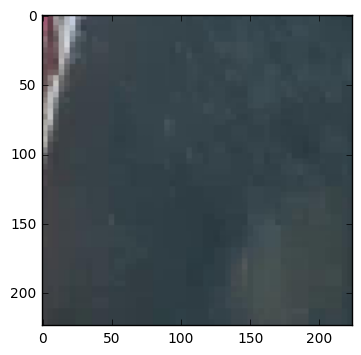

[(u'n03773504', u'missile', 0.041183483), (u'n02840245', u'binder', 0.035286725), (u'n02814860', u'beacon', 0.033478279), (u'n02977058', u'cash_machine', 0.025850207), (u'n04266014', u'space_shuttle', 0.01732281), (u'n04147183', u'schooner', 0.016698435), (u'n03467068', u'guillotine', 0.016076183), (u'n09288635', u'geyser', 0.015372734), (u'n03344393', u'fireboat', 0.014632277), (u'n03240683', u'drilling_platform', 0.01329685)]


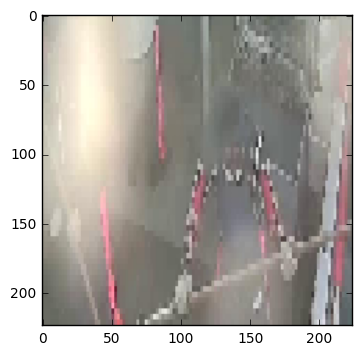

[(u'n03344393', u'fireboat', 0.90987676), (u'n09288635', u'geyser', 0.016482214), (u'n03388043', u'fountain', 0.014048326), (u'n04008634', u'projectile', 0.0068840836), (u'n03773504', u'missile', 0.0053002913), (u'n02895154', u'breastplate', 0.0047463859), (u'n04209239', u'shower_curtain', 0.0030978187), (u'n02815834', u'beaker', 0.0023607507), (u'n03062245', u'cocktail_shaker', 0.0023471166), (u'n02948072', u'candle', 0.0019721875)]


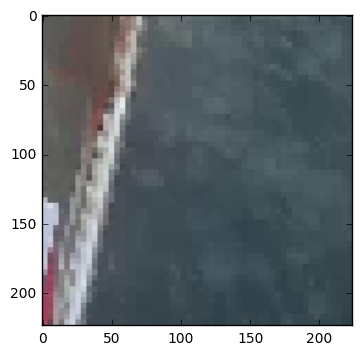

[(u'n03633091', u'ladle', 0.066948049), (u'n02840245', u'binder', 0.062334754), (u'n03095699', u'container_ship', 0.045870855), (u'n02687172', u'aircraft_carrier', 0.044598948), (u'n03773504', u'missile', 0.034032404), (u'n02865351', u'bolo_tie', 0.023313886), (u'n02895154', u'breastplate', 0.021831583), (u'n07248320', u'book_jacket', 0.019434225), (u'n03884397', u'panpipe', 0.015830854), (u'n03146219', u'cuirass', 0.015684666)]


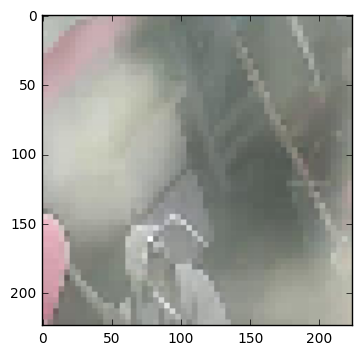

[(u'n03344393', u'fireboat', 0.89637691), (u'n03291819', u'envelope', 0.00997198), (u'n03388043', u'fountain', 0.0060632951), (u'n01776313', u'tick', 0.0047185831), (u'n04209239', u'shower_curtain', 0.0030714248), (u'n04275548', u'spider_web', 0.0025562493), (u'n01773549', u'barn_spider', 0.0020947512), (u'n02782093', u'balloon', 0.0018844432), (u'n01910747', u'jellyfish', 0.001743164), (u'n02443484', u'black-footed_ferret', 0.0015072727)]


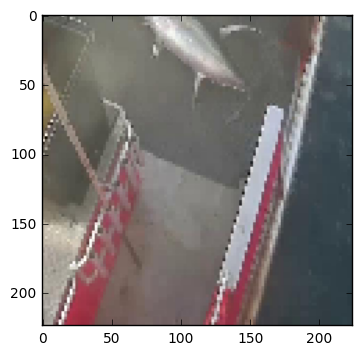

[(u'n02640242', u'sturgeon', 0.25791696), (u'n03344393', u'fireboat', 0.10799024), (u'n02641379', u'gar', 0.071261756), (u'n04552348', u'warplane', 0.064775296), (u'n02999410', u'chain', 0.029003609), (u'n03794056', u'mousetrap', 0.026476691), (u'n01484850', u'great_white_shark', 0.021998713), (u'n02895154', u'breastplate', 0.019920804), (u'n03000684', u'chain_saw', 0.017157329), (u'n04153751', u'screw', 0.016868494)]


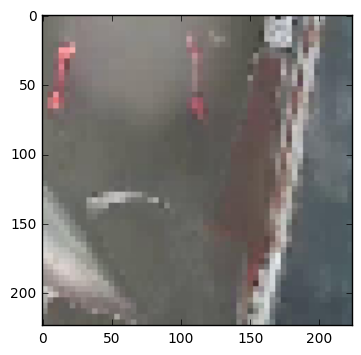

[(u'n03344393', u'fireboat', 0.19948013), (u'n03095699', u'container_ship', 0.11175153), (u'n04310018', u'steam_locomotive', 0.079317413), (u'n03496892', u'harvester', 0.030938236), (u'n02895154', u'breastplate', 0.030420816), (u'n03345487', u'fire_engine', 0.026779242), (u'n02916936', u'bulletproof_vest', 0.026515963), (u'n03146219', u'cuirass', 0.024069481), (u'n04252225', u'snowplow', 0.021200879), (u'n03773504', u'missile', 0.015795648)]


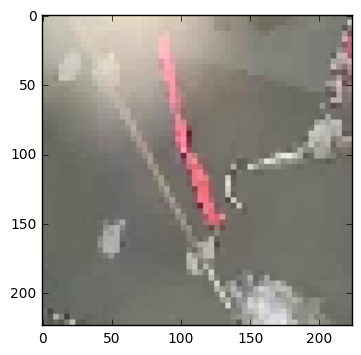

[(u'n03095699', u'container_ship', 0.35422179), (u'n02687172', u'aircraft_carrier', 0.12538131), (u'n03344393', u'fireboat', 0.063595533), (u'n02708093', u'analog_clock', 0.037013564), (u'n04310018', u'steam_locomotive', 0.029538872), (u'n02692877', u'airship', 0.017874911), (u'n02892767', u'brassiere', 0.017489739), (u'n03729826', u'matchstick', 0.015311709), (u'n03920288', u'Petri_dish', 0.01381581), (u'n02999410', u'chain', 0.013701897)]


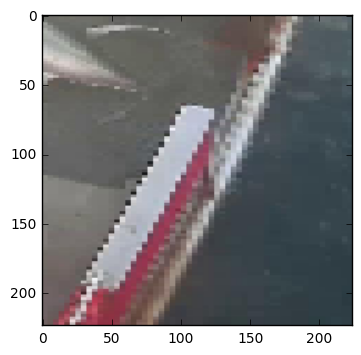

[(u'n02640242', u'sturgeon', 0.22761898), (u'n02687172', u'aircraft_carrier', 0.22387369), (u'n02641379', u'gar', 0.12037558), (u'n03000684', u'chain_saw', 0.060971387), (u'n04153751', u'screw', 0.021555278), (u'n03633091', u'ladle', 0.018065639), (u'n03481172', u'hammer', 0.017581878), (u'n03908714', u'pencil_sharpener', 0.016631026), (u'n02690373', u'airliner', 0.015026627), (u'n02514041', u'barracouta', 0.01335676)]


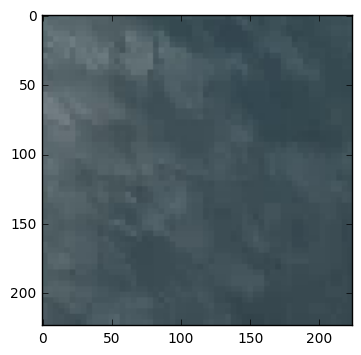

[(u'n03773504', u'missile', 0.067178227), (u'n04008634', u'projectile', 0.065383695), (u'n09288635', u'geyser', 0.053508662), (u'n02840245', u'binder', 0.046927784), (u'n04266014', u'space_shuttle', 0.038359862), (u'n02692877', u'airship', 0.035496127), (u'n03347037', u'fire_screen', 0.024700399), (u'n04525038', u'velvet', 0.02189544), (u'n02074367', u'dugong', 0.020511506), (u'n02066245', u'grey_whale', 0.018004127)]


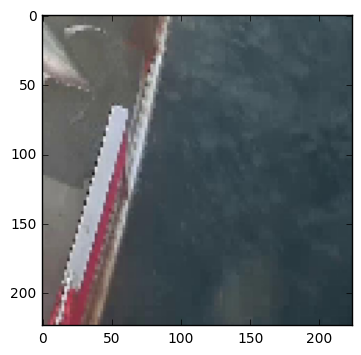

[(u'n02687172', u'aircraft_carrier', 0.12590401), (u'n04552348', u'warplane', 0.070942551), (u'n03291819', u'envelope', 0.064406924), (u'n03344393', u'fireboat', 0.052157003), (u'n04192698', u'shield', 0.0477557), (u'n02840245', u'binder', 0.042659625), (u'n03871628', u'packet', 0.041981291), (u'n04483307', u'trimaran', 0.039373495), (u'n02895154', u'breastplate', 0.02793682), (u'n07248320', u'book_jacket', 0.027365949)]


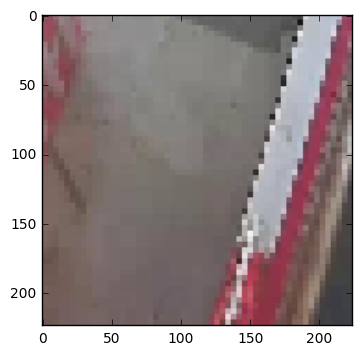

[(u'n03633091', u'ladle', 0.072750285), (u'n03495258', u'harp', 0.058705971), (u'n04153751', u'screw', 0.057868458), (u'n03908714', u'pencil_sharpener', 0.055241771), (u'n03804744', u'nail', 0.054279007), (u'n04367480', u'swab', 0.043621935), (u'n03532672', u'hook', 0.039506499), (u'n02840245', u'binder', 0.035354495), (u'n03467068', u'guillotine', 0.034751188), (u'n02999410', u'chain', 0.033883415)]


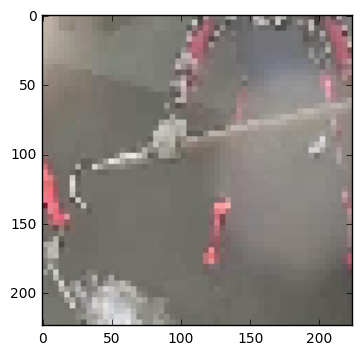

[(u'n03095699', u'container_ship', 0.1807145), (u'n04310018', u'steam_locomotive', 0.045480888), (u'n03345487', u'fire_engine', 0.028371943), (u'n03467068', u'guillotine', 0.027974077), (u'n03344393', u'fireboat', 0.025981525), (u'n04553703', u'washbasin', 0.025137288), (u'n03742115', u'medicine_chest', 0.023258703), (u'n04296562', u'stage', 0.021325704), (u'n03920288', u'Petri_dish', 0.019095484), (u'n04347754', u'submarine', 0.018581675)]


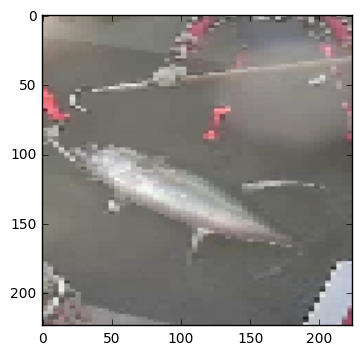

[(u'n03344393', u'fireboat', 0.4896031), (u'n02687172', u'aircraft_carrier', 0.10809734), (u'n02692877', u'airship', 0.065140545), (u'n02641379', u'gar', 0.060740858), (u'n02640242', u'sturgeon', 0.043654248), (u'n04552348', u'warplane', 0.030546371), (u'n03095699', u'container_ship', 0.026260942), (u'n02690373', u'airliner', 0.014497387), (u'n02536864', u'coho', 0.01416394), (u'n02514041', u'barracouta', 0.013915282)]


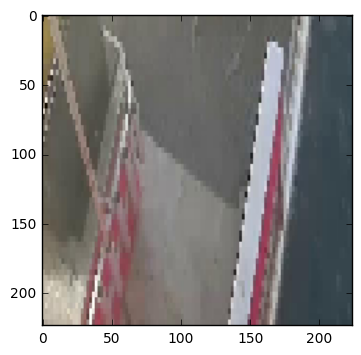

[(u'n03467068', u'guillotine', 0.66067261), (u'n02895154', u'breastplate', 0.030263996), (u'n03344393', u'fireboat', 0.027038034), (u'n04209239', u'shower_curtain', 0.020759979), (u'n02999410', u'chain', 0.016436825), (u'n03794056', u'mousetrap', 0.012510048), (u'n03146219', u'cuirass', 0.010838952), (u'n04367480', u'swab', 0.008758422), (u'n03742115', u'medicine_chest', 0.007864506), (u'n04125021', u'safe', 0.0067941491)]


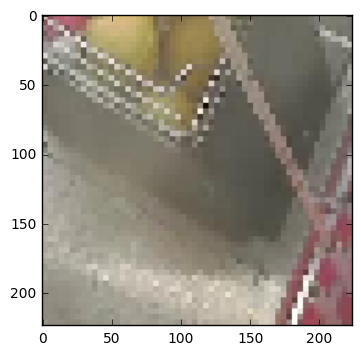

[(u'n03794056', u'mousetrap', 0.082009815), (u'n03291819', u'envelope', 0.065970369), (u'n02948072', u'candle', 0.063749976), (u'n03733281', u'maze', 0.059127789), (u'n03916031', u'perfume', 0.053620823), (u'n02999410', u'chain', 0.041375294), (u'n04252225', u'snowplow', 0.038020935), (u'n03485794', u'handkerchief', 0.034239702), (u'n03871628', u'packet', 0.029795483), (u'n03814906', u'necklace', 0.020238824)]


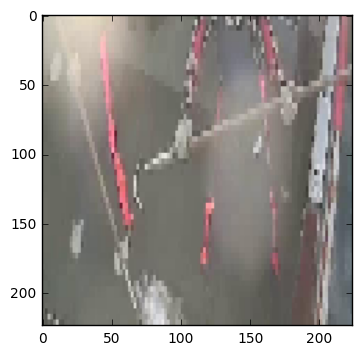

[(u'n03344393', u'fireboat', 0.42961583), (u'n02895154', u'breastplate', 0.076281331), (u'n02892767', u'brassiere', 0.037020754), (u'n03764736', u'milk_can', 0.031369377), (u'n03146219', u'cuirass', 0.022109834), (u'n03017168', u'chime', 0.019634189), (u'n03467068', u'guillotine', 0.017126068), (u'n02747177', u'ashcan', 0.016707238), (u'n02999410', u'chain', 0.016469721), (u'n02948072', u'candle', 0.010119656)]


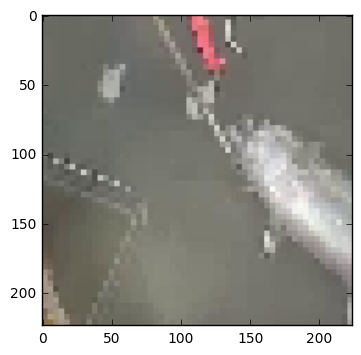

[(u'n02687172', u'aircraft_carrier', 0.70220238), (u'n02999410', u'chain', 0.13320397), (u'n03095699', u'container_ship', 0.084114745), (u'n03344393', u'fireboat', 0.011008717), (u'n04552348', u'warplane', 0.0093862237), (u'n03773504', u'missile', 0.0074986275), (u'n02640242', u'sturgeon', 0.0069377096), (u'n04310018', u'steam_locomotive', 0.0034632701), (u'n03673027', u'liner', 0.0028104652), (u'n03109150', u'corkscrew', 0.0018220283)]


In [22]:

outcome = []
for img_path in image_df.image_name[:1]:
#img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    hor = [56,112]
    ver = [56,112]
    for i in hor:
        for j in ver:
            long_slice(img_path, os.getcwd(), i, j)
    #test_files = ['slice_11.png','slice_21.png','slice_12.png','slice_22.png']
    suboutcome = []
    for image_name in glob.glob('test/*.png'):
    #for i in range(4):
        #afmeting = afmetingen[i]
         #   print img.size
        img = image.load_img(image_name, target_size=(224, 224))
        #plt.figure()
        #plt.imshow(img)
        #row = img.size[0]
        #col = img.size[1]
        #print type(img)
          #  img = img.crop((0,112,0,112))
        #img = img.load()
           # print type(img.load())
        #img = img.resize(2,2)
        #plt.imshow(img)
        x = image.img_to_array(img)
        #print x.shape
        
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
        suboutcome.append((img,decode_predictions(preds, top=10)[0]))
    outcome.append(suboutcome)
for suboutcome in outcome:
    for subimage in suboutcome:
        plt.imshow(subimage[0])
        plt.show()
        print subimage[1]   
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

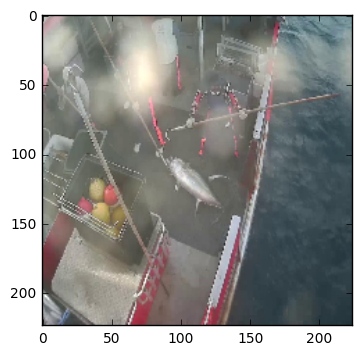

In [151]:
for img_path in image_df.image_name[:1]:
#img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)

In [124]:
# Smaller dataset for testing purposes!
dummy_df = dummy_df.iloc[0:101,:]

In [125]:
Image(url= "https://kaggle2.blob.core.windows.net/competitions/kaggle/5568/media/species-ref-key.jpg")

In [14]:
is_a_df = pd.read_csv('./is_a.csv',delimiter=' ',header=None)
is_a_df.columns = ['parent','child']

fish_labels = []

def findChildrenFish(df,parent):
    children = is_a_df[is_a_df['parent'] == parent].child
    #print children
    if children.shape[0]== 0:
        return None
    else:
        return children.tolist()

fish = 'n02512053'
children = is_a_df[is_a_df['parent'] == fish].child
fish_labels.append(children.tolist())
    

In [20]:
def is_a(df,parent,fish_labels):
    children = findChildrenFish(df,parent)
    if children == None:
        return None
    else:
        fish_labels.append(children)
        for child in children:
            new_labels = is_a(df,child,fish_labels)
            if new_labels != None:
                fish_labels.append(new_labels)
    return(fish_labels)
fish_labels = is_a(is_a_df,fish,[])

In [22]:
fish_labels = [f for f in fish_labels if len(f) < 300]

In [23]:
fish_labels

[['n01316579',
  'n01316838',
  'n01480516',
  'n02512752',
  'n02512830',
  'n02512938',
  'n02513248',
  'n02513560',
  'n02513805',
  'n02513939',
  'n02514320',
  'n02514825',
  'n02556373'],
 ['n02599958'],
 ['n02600298'],
 ['n02600503', 'n02600798'],
 ['n01480880', 'n01482071'],
 ['n01481331'],
 ['n01481498'],
 ['n01482330', 'n01495701'],
 ['n01483021',
  'n01483522',
  'n01486010',
  'n01486540',
  'n01486838',
  'n01487506',
  'n01488038',
  'n01488385',
  'n01488918',
  'n01491874',
  'n01494475',
  'n01495493'],
 ['n01483830', 'n01484097', 'n01484850', 'n01485479'],
 ['n01484285', 'n01484447', 'n01484562'],
 ['n01489501',
  'n01489709',
  'n01489920',
  'n01490112',
  'n01490360',
  'n01490670',
  'n01491006',
  'n01491361',
  'n01491661'],
 ['n01492357', 'n01493541'],
 ['n01492569', 'n01492708', 'n01492860', 'n01493146'],
 ['n01493829', 'n01494041'],
 ['n01494757', 'n01494882', 'n01495006'],
 ['n01496331',
  'n01497118',
  'n01497738',
  'n01498041',
  'n01498989',
  'n01500

In [24]:
fish_labels_flat = [f for list in fish_labels for f in list]
f = open('fish_labels.txt','w')
f.write(str(fish_labels_flat))
f.close()

In [84]:
second_children = []
for child in children:
    second_children.append(findChildrenFish(is_a_df,child))
    fish_labels.append([c for c in second_children if len(c) != 0])

    

In [ ]:
third_children = []
print second_children
for child in second_children:
    print(child)
    #if(child.)
    third_children.append(findChildrenFish(is_a_df,child))
    #print third_children
    fish_labels.append([c for c in third_children if len(c) != 0])
    

In [25]:
fish_labels

[['n01316579',
  'n01316838',
  'n01480516',
  'n02512752',
  'n02512830',
  'n02512938',
  'n02513248',
  'n02513560',
  'n02513805',
  'n02513939',
  'n02514320',
  'n02514825',
  'n02556373'],
 ['n02599958'],
 ['n02600298'],
 ['n02600503', 'n02600798'],
 ['n01480880', 'n01482071'],
 ['n01481331'],
 ['n01481498'],
 ['n01482330', 'n01495701'],
 ['n01483021',
  'n01483522',
  'n01486010',
  'n01486540',
  'n01486838',
  'n01487506',
  'n01488038',
  'n01488385',
  'n01488918',
  'n01491874',
  'n01494475',
  'n01495493'],
 ['n01483830', 'n01484097', 'n01484850', 'n01485479'],
 ['n01484285', 'n01484447', 'n01484562'],
 ['n01489501',
  'n01489709',
  'n01489920',
  'n01490112',
  'n01490360',
  'n01490670',
  'n01491006',
  'n01491361',
  'n01491661'],
 ['n01492357', 'n01493541'],
 ['n01492569', 'n01492708', 'n01492860', 'n01493146'],
 ['n01493829', 'n01494041'],
 ['n01494757', 'n01494882', 'n01495006'],
 ['n01496331',
  'n01497118',
  'n01497738',
  'n01498041',
  'n01498989',
  'n01500

In [9]:
[c for c in second_children if c.shape[0]!= 0]
print (fish_labels)

NameError: name 'second_children' is not defined

In [126]:
# Count of the image types
image_df.groupby('fish_type').count().sort_values('image_name')

image_name
fish_type            
LAG                67
DOL               117
ARK               176
BET               200
HER               299
NoF               465
YFT               734
ALB              1719

In [127]:
count = 0 # count, to test the algorithm with 100 pictures
images = []

for filename in dummy_df.image_name:
    img = cv2.imread(filename) # Read file    
    img = cv2.resize(img, (224, 224)) # Resize image to 224 x 224 pixels (dont feel obliged to use this)
    img = img.astype(np.float32) # Change to 32 bit floats (good for neural networks, other floats not as much making sense)

    # "Normalize" images
    for rgb_value in [0,1,2]:
        img[:, :, rgb_value] = img[:, :, rgb_value] / 255.0 # 255 is the RGB maximum
        img[:, :, rgb_value] -= numpy.mean(img[:, :, rgb_value])

    img = img.transpose((2,0,1))

    images.append(img)

# X and y value and labels
x = np.asarray(images)
y = dummy_df.iloc[:,1:9].as_matrix()
labels = dummy_df.image_name.apply(lambda path: path[-13:])

# table, just to be sure that everything goes well
dummy_df['image_bytes'] = images
dummy_df.head()

image_name  fish_type_ALB  fish_type_ARK  \
3354  ../Data/Kaggle/train/DOL/img_02936.jpg              0              0   
2905  ../Data/Kaggle/train/YFT/img_02550.jpg              0              0   
717   ../Data/Kaggle/train/BET/img_05974.jpg              0              0   
1230  ../Data/Kaggle/train/YFT/img_03253.jpg              0              0   
1837  ../Data/Kaggle/train/ALB/img_06512.jpg              1              0   

      fish_type_BET  fish_type_DOL  fish_type_HER  fish_type_LAG  \
3354              0              1              0              0   
2905              0              0              0              0   
717               1              0              0              0   
1230              0              0              0              0   
1837              0              0              0              0   

      fish_type_NoF  fish_type_YFT  \
3354              0              0   
2905              0              1   
717               0              0   
1230              0              1   
1837              0              0   

                                            image_bytes  
3354  [[[0.226613, 0.0187695, 0.0932793, 0.112887, 0...  
2905  [[[-0.0122658, -0.00834423, -0.00834423, 0.062...  
717   [[[0.56314, 0.551375, 0.555297, 0.56314, 0.539...  
1230  [[[0.707718, 0.695954, 0.699875, 0.707718, 0.6...  
1837  [[[-0.130154, -0.122311, -0.114468, -0.114468,...

In [133]:
split_no = 90

x_train = x[:split_no]
y_train = y[:split_no]
labels_train = labels[:split_no]

x_test = x[split_no:]
y_test = y[split_no:]
labels_test = labels[split_no:]

In [130]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 224, 224), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
# Compile model
epochs = 1 # dont leave it like this, only for testing!
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 32, 224, 224)  896         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
dropout_9 (Dropout)              (None, 32, 224, 224)  0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 32, 224, 224)  9248        dropout_9[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 32, 112, 112)  0           convolution2d_10[0][0]           
___________________________________________________________________________________________

In [131]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
classes = model.predict_proba(x_test, batch_size=32)

# get probability table
proba_df = pd.DataFrame(classes)
proba_df.columns = image_df.groupby('fish_type').count().index # workaround to get column names quickly and in right order

print("Accuracy: %.2f%%" % (scores[1]*100))
print ' '
proba_df

Train on 90 samples, validate on 11 samples
Epoch 1/1
11/11 [==============================] - 0s
Accuracy: 54.55%
 


fish_type       ALB       ARK       BET       DOL       HER       LAG  \
0          0.506756  0.024877  0.058784  0.065291  0.051306  0.038819   
1          0.428844  0.023427  0.058552  0.071125  0.041804  0.033080   
2          0.437535  0.022948  0.063415  0.064843  0.045019  0.035351   
3          0.609962  0.009597  0.037177  0.039952  0.025592  0.016731   
4          0.488781  0.027245  0.060165  0.067221  0.048789  0.037209   
5          0.448581  0.025906  0.067605  0.069368  0.052836  0.039578   
6          0.397859  0.036983  0.075243  0.079164  0.065603  0.052575   
7          0.408537  0.033430  0.072096  0.076143  0.060677  0.048232   
8          0.389521  0.016347  0.062469  0.062859  0.036389  0.025675   
9          0.344012  0.035175  0.081605  0.091208  0.060461  0.049630   
10         0.552715  0.020467  0.051549  0.059204  0.043647  0.030208   

fish_type       NoF       YFT  
0          0.109125  0.145042  
1          0.154019  0.189149  
2          0.128865  0.202024  
3          0.098356  0.162632  
4          0.107406  0.163185  
5          0.117511  0.178615  
6          0.127660  0.164914  
7          0.127109  0.173777  
8          0.118288  0.288453  
9          0.136820  0.201089  
10         0.100116  0.142094

In [142]:
proba_df['img_names'] = labels_test.values

fish_type       ALB       ARK       BET       DOL       HER       LAG  \
0          0.506756  0.024877  0.058784  0.065291  0.051306  0.038819   
1          0.428844  0.023427  0.058552  0.071125  0.041804  0.033080   
2          0.437535  0.022948  0.063415  0.064843  0.045019  0.035351   
3          0.609962  0.009597  0.037177  0.039952  0.025592  0.016731   
4          0.488781  0.027245  0.060165  0.067221  0.048789  0.037209   
5          0.448581  0.025906  0.067605  0.069368  0.052836  0.039578   
6          0.397859  0.036983  0.075243  0.079164  0.065603  0.052575   
7          0.408537  0.033430  0.072096  0.076143  0.060677  0.048232   
8          0.389521  0.016347  0.062469  0.062859  0.036389  0.025675   
9          0.344012  0.035175  0.081605  0.091208  0.060461  0.049630   
10         0.552715  0.020467  0.051549  0.059204  0.043647  0.030208   

fish_type       NoF       YFT      img_names  
0          0.109125  0.145042  img_05281.jpg  
1          0.154019  0.189149  img_01118.jpg  
2          0.128865  0.202024  img_07869.jpg  
3          0.098356  0.162632  img_01287.jpg  
4          0.107406  0.163185  img_01144.jpg  
5          0.117511  0.178615  img_02519.jpg  
6          0.127660  0.164914  img_05043.jpg  
7          0.127109  0.173777  img_04851.jpg  
8          0.118288  0.288453  img_05282.jpg  
9          0.136820  0.201089  img_01156.jpg  
10         0.100116  0.142094  img_07273.jpg